<a href="https://colab.research.google.com/github/Sriharish19/SH-Supervised-ML-Cardiovascular-Risk-Prediction/blob/main/SH_Supervised_ML_Classification_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

import folium
from folium.plugins import HeatMap
import plotly.express as px
import plotly as plot

pd.set_option('display.max_columns', 20)

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_recall_curve,auc,classification_report,roc_curve,auc
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_validate

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

import math

In [2]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/Mydrive')

Mounted at /content/Mydrive


In [3]:
# Reading the CSV file
df = pd.read_csv('/content/Mydrive/MyDrive/Capstone project 4- Cardio vascular risk prediction/data_cardiovascular_risk.csv')

In [4]:
data = df

In [5]:
# Shape
df.shape

(3390, 17)

In [6]:
# Head
df.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [7]:
#Tail
df.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3385,3385,60,1.0,F,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0
3386,3386,46,1.0,F,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0
3387,3387,44,3.0,M,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1
3388,3388,60,1.0,M,NO,0.0,NaN,0,1,0,191.0,167.0,105.0,23.01,80.0,85.0,0
3389,3389,54,3.0,F,NO,0.0,0.0,0,0,0,288.0,124.0,77.0,29.88,79.0,92.0,0


In [8]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [9]:
# Duplicates
df.duplicated().sum()

0

In [10]:

# Null values
df.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

In [11]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

df['sex'] = df['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

df['is_smoking'] = df['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [12]:
# Treating NULL values
# 'education'
df['education'].fillna(0,inplace = True)
df.groupby('education').agg({'age':'mean'})
# print(df.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1' because based on the age the education varies.
df['education'] = df['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(df[df['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
# As the average number of cigarettes consumed by Females is 14 and Males is 22
# So replacing null values with 14 for smoking female patients and 22 for smoking male patients.
df.loc[(df.sex == 0) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  14
df.loc[(df.sex == 1) & (df['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
df['totChol'].fillna(int(df['totChol'].mean()), inplace = True)

# 'BMI'
df['BMI'].fillna(int(df['BMI'].mean()), inplace = True)

# 'Heart rate'
df['heartRate'].fillna(int(df['heartRate'].mean()), inplace = True)


# 'glucose'
df.groupby('diabetes').agg({'glucose':'mean'})
# print(df.groupby('diabetes').agg({'glucose':'mean'}))
# Average Glucose level of Patients without Diabetes is 79 and with Diabetes is 172
# So replacing null values with 79 for patients without diabetes and 172 for patients with diabetes.
df.loc[ (df.diabetes == 0) & (df['glucose'].isna()), 'glucose'] =  79
df.loc[ (df.diabetes == 1) & (df['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
df.loc[(df.prevalentHyp == 1) & (df['BPMeds'].isna()), 'BPMeds'] =  1

In [13]:
# Droping the rows with 'BPMeds' as Nan value
df = df.dropna()
df.shape

(3365, 17)

In [14]:
# Summary
round(df.describe([0.95,0.99],include = 'all'),2)

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3365.00,3365.00,3365.00,3365.00,3365.0,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00,3365.00
mean,1695.31,49.53,1.95,0.43,0.5,9.11,0.04,0.01,0.32,0.03,237.12,132.67,82.93,25.80,75.98,81.92,0.15
std,978.64,8.59,1.02,0.50,0.5,11.85,0.18,0.08,0.47,0.16,44.98,22.34,12.04,4.11,11.99,23.37,0.36
min,0.00,32.00,1.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,107.00,83.50,48.00,15.96,45.00,40.00,0.00
50%,1694.00,49.00,2.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,235.00,128.50,82.00,25.38,75.00,79.00,0.00
95%,3219.80,64.00,4.00,1.00,1.0,30.00,0.00,0.00,1.00,0.00,313.00,175.90,105.00,32.84,98.00,108.00,1.00
99%,3355.36,67.00,4.00,1.00,1.0,43.00,1.00,0.00,1.00,1.00,354.36,202.18,119.36,38.87,110.00,173.00,1.00
max,3389.00,70.00,4.00,1.00,1.0,70.00,1.00,1.00,1.00,1.00,696.00,295.00,142.50,56.80,143.00,394.00,1.00


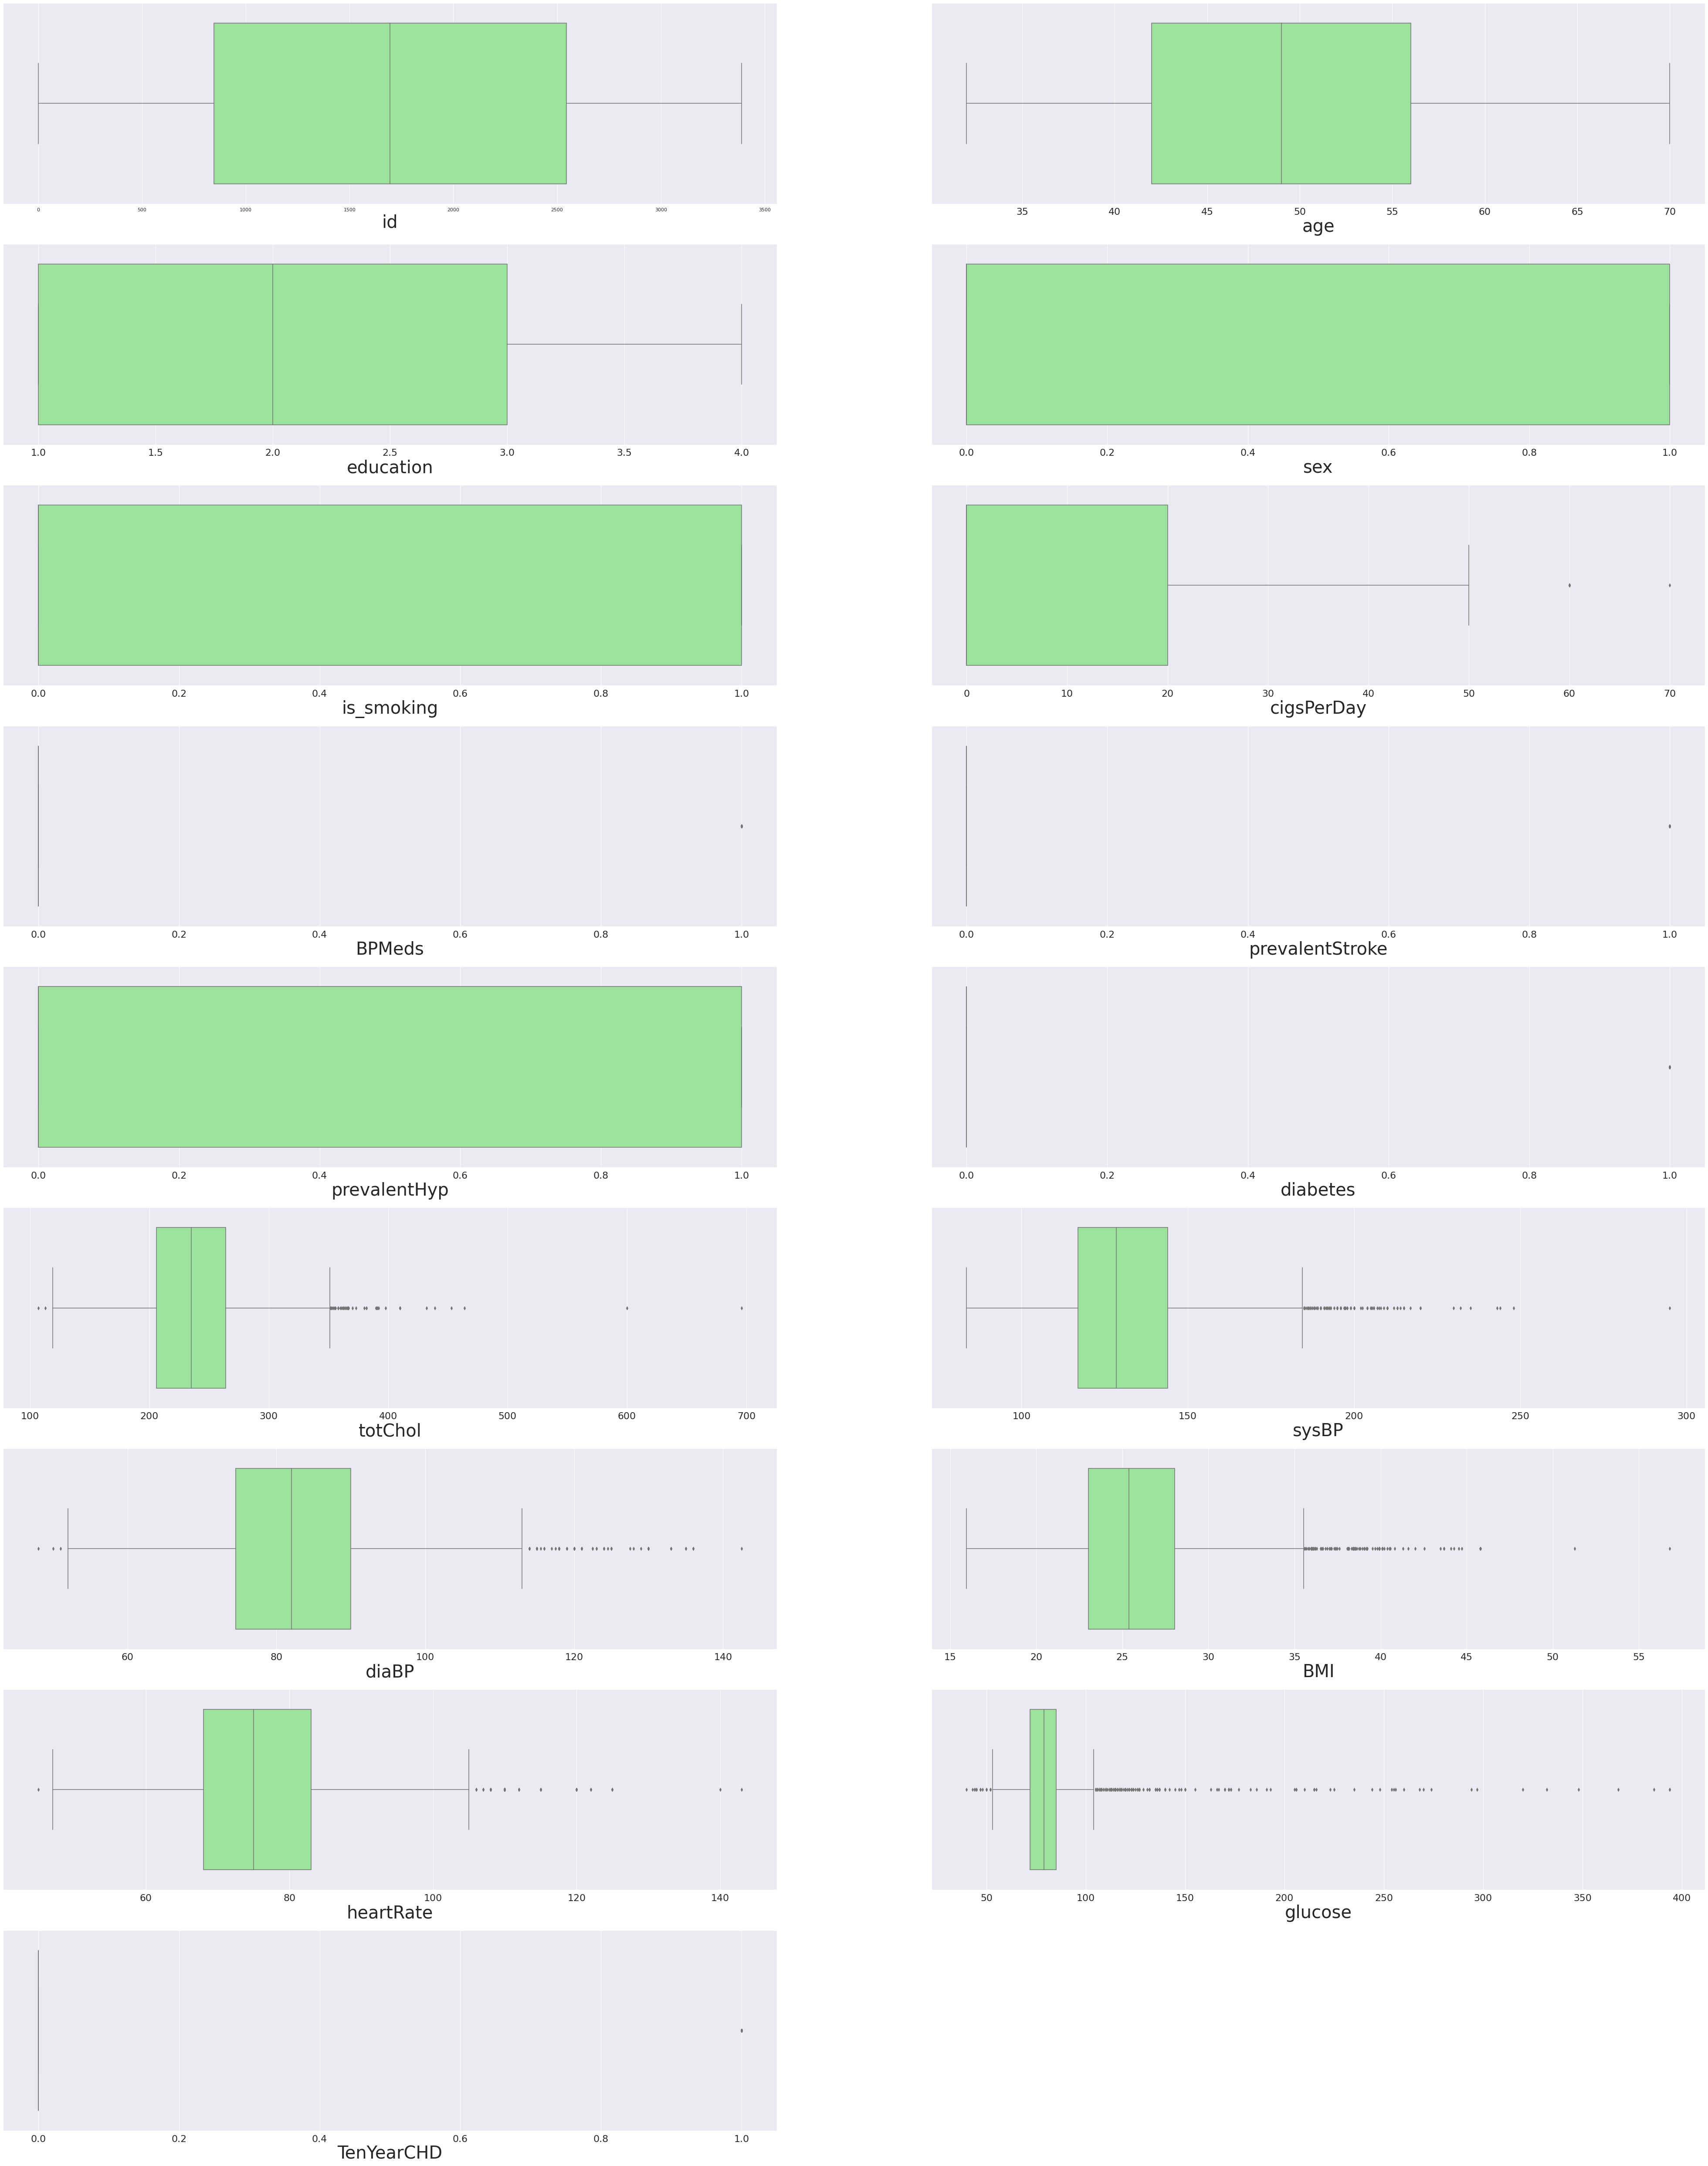

In [15]:
# Box plot to detect outliers

lst_box = df.describe().columns
plt.figure(figsize = (70,100))
sns.set_theme()
for i in enumerate(lst_box):
    plt.subplot(10, 2,i[0]+1)
    sns.set(font_scale = 2)
    sns.boxplot(df[i[1]],color='lightgreen')
    plt.xlabel(i[1],fontsize=40)

In [16]:
# Z Score based technique to remove outliers
lst = ['cigsPerDay','totChol','sysBP','diaBP','BMI','heartRate','glucose']
for i in lst:
  lower_limit = df[i].mean() - 3*df[i].std()
  print(i+'Lower_limit:',round(lower_limit,2))  
  upper_limit = df[i].mean() + 3*df[i].std()
  print(i+'Upper_limit:',round(upper_limit,2))
  df[i] = np.where(df[i]>upper_limit,upper_limit,np.where(df[i]<lower_limit,lower_limit,df[i]))

cigsPerDayLower_limit: -26.46
cigsPerDayUpper_limit: 44.67
totCholLower_limit: 102.2
totCholUpper_limit: 372.05
sysBPLower_limit: 65.66
sysBPUpper_limit: 199.69
diaBPLower_limit: 46.81
diaBPUpper_limit: 119.04
BMILower_limit: 13.48
BMIUpper_limit: 38.12
heartRateLower_limit: 40.02
heartRateUpper_limit: 111.95
glucoseLower_limit: 11.8
glucoseUpper_limit: 152.04


In [17]:
df['totChol'].std()

43.33319340651982

In [19]:
df['totChol'].mean()

236.7919654747848

In [20]:
#columns
df.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

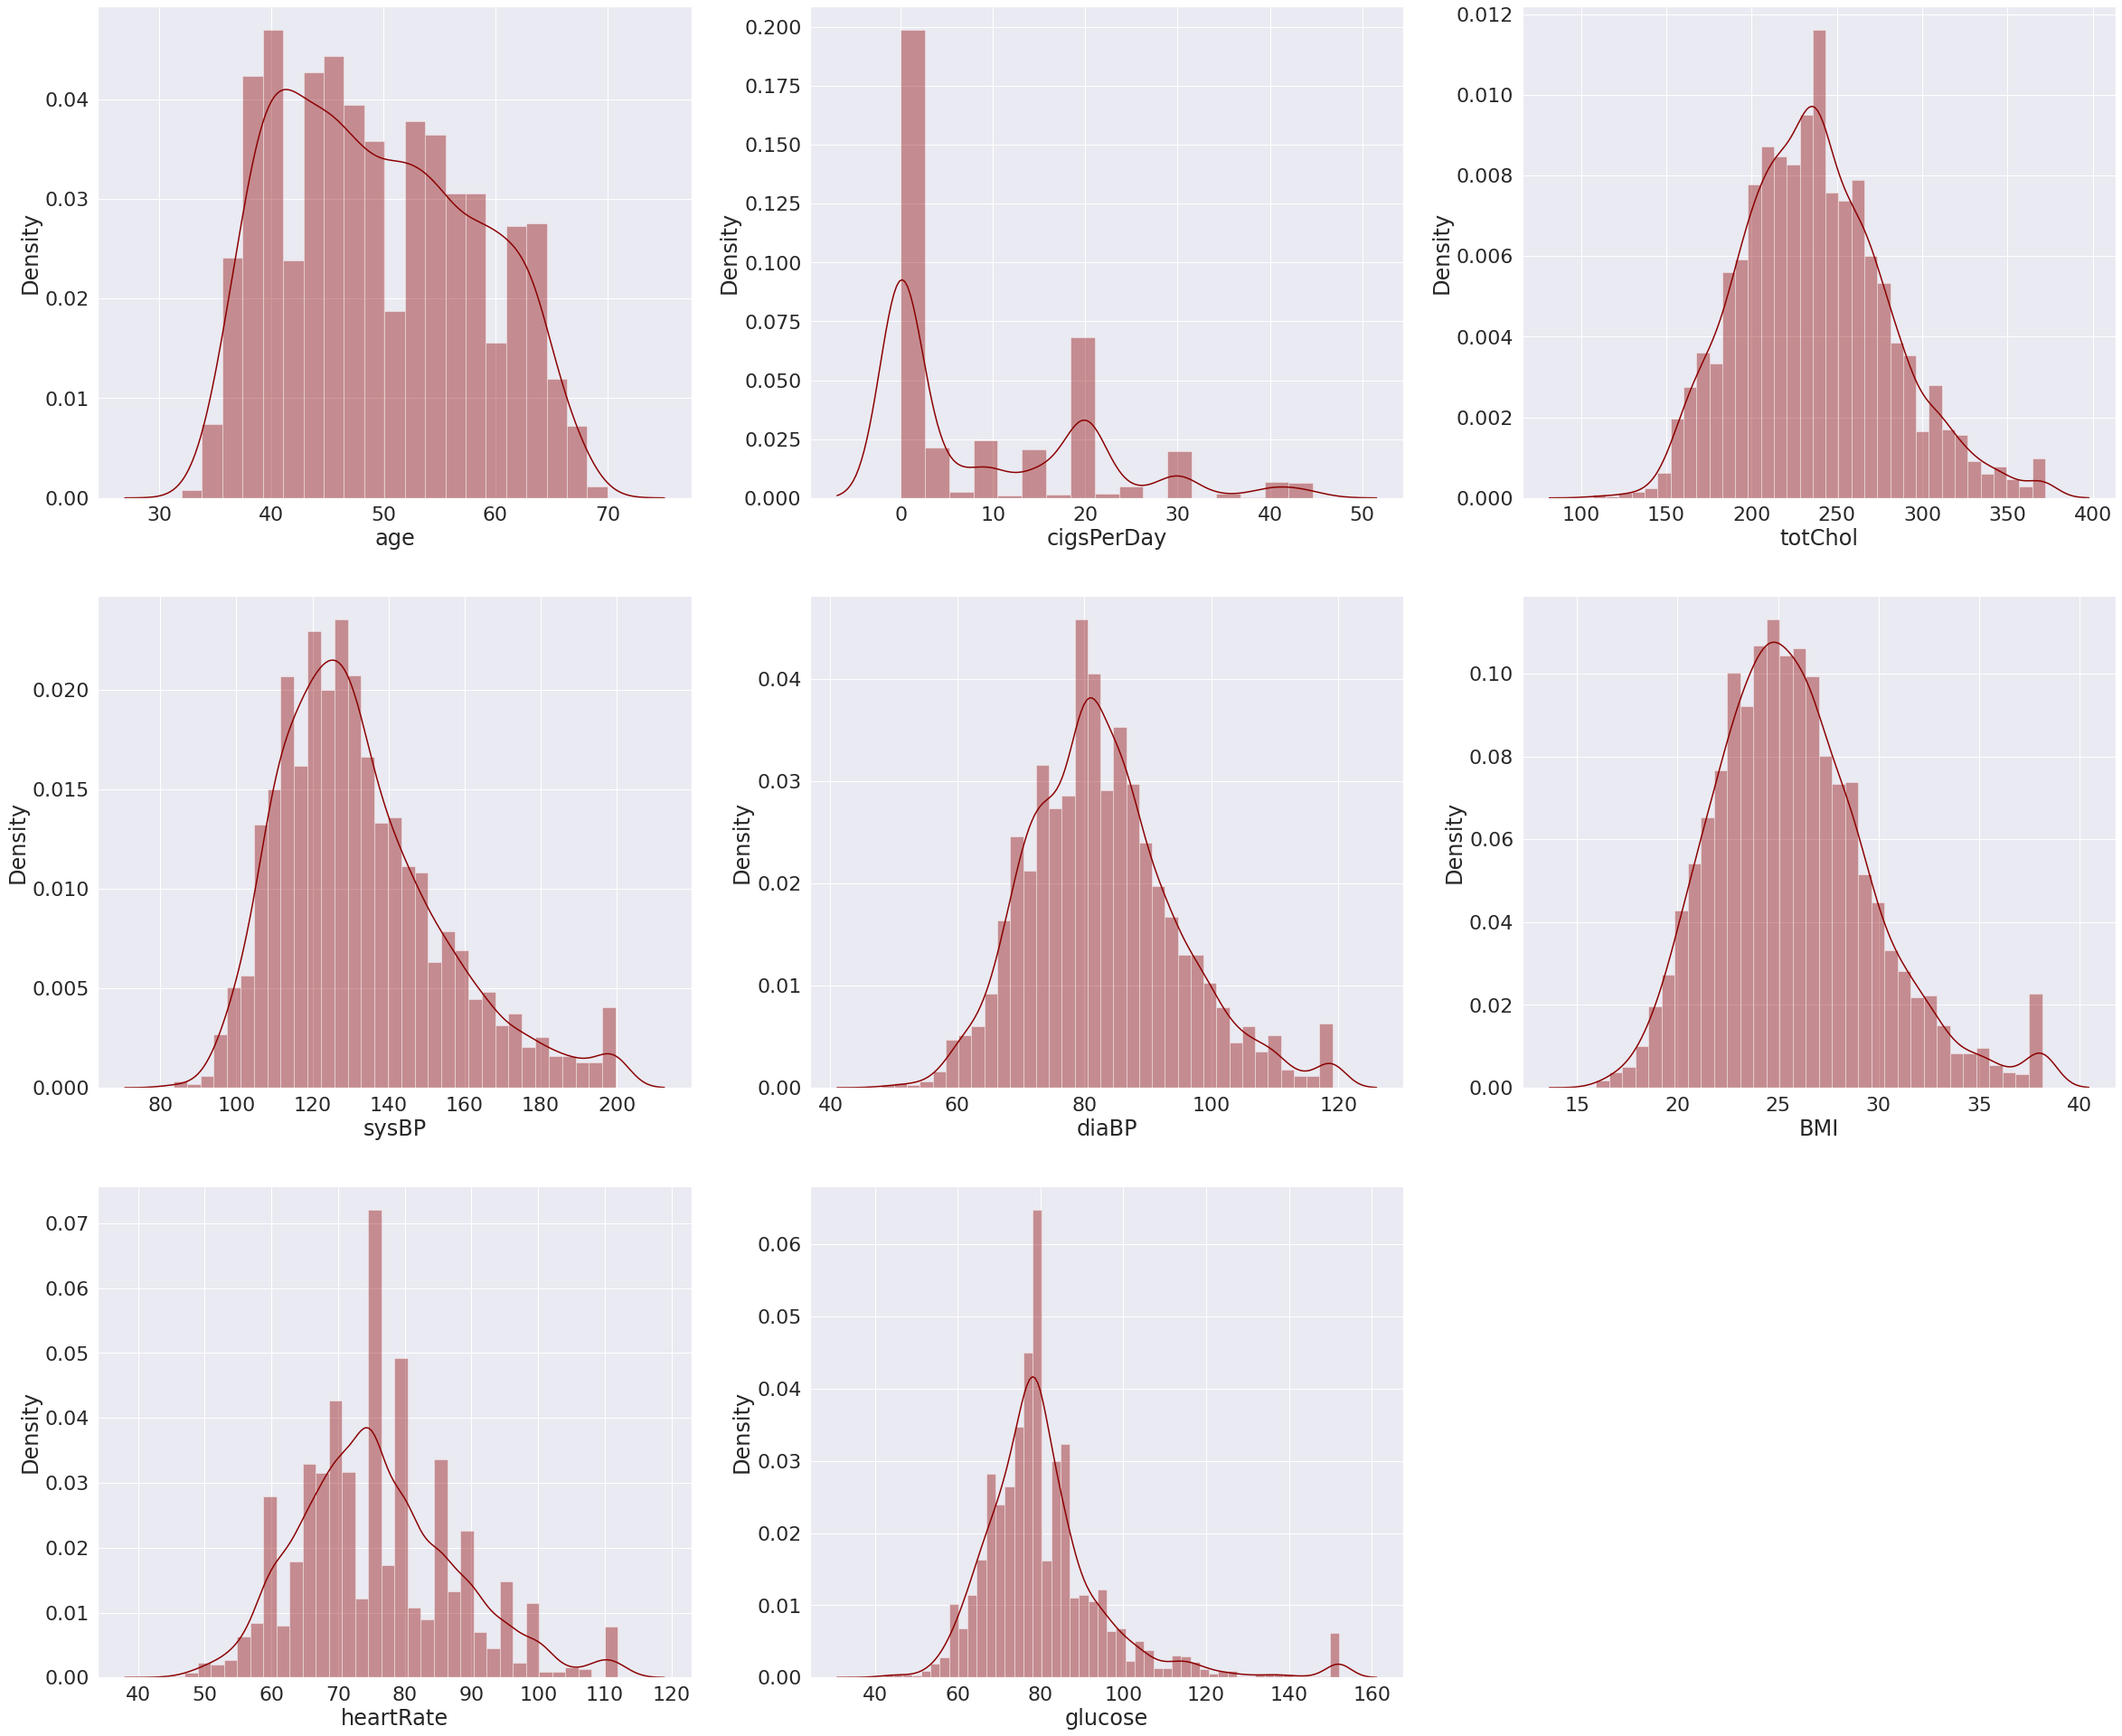

In [21]:
# Distribution plot for numerical variables
lst_dist = ['age','cigsPerDay','totChol', 'sysBP','diaBP', 'BMI', 'heartRate', 'glucose']

plt.figure(figsize = (40,70))
sns.set_theme()
for i in enumerate(lst_dist):
  sns.set(font_scale = 2)
  plt.subplot(6, 3,i[0]+1)
  sns.distplot(df[i[1]],color = 'darkred')

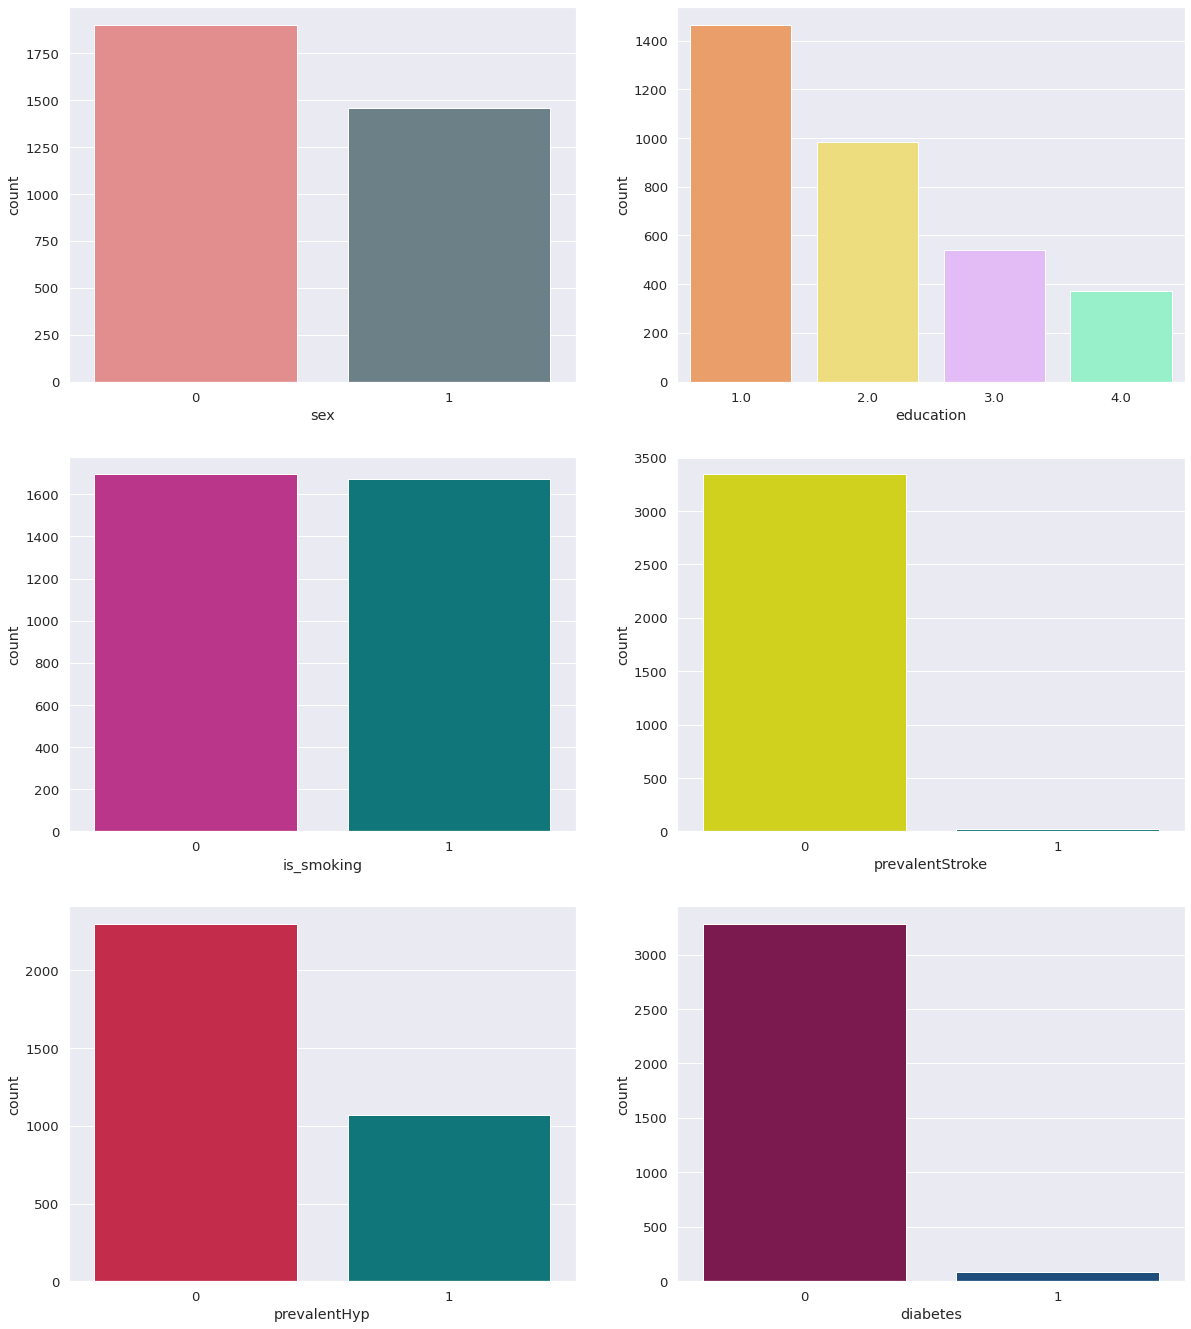

In [22]:
# Value counts Plot
categorical_var_count = ['sex', 'education', 'is_smoking', 'prevalentStroke', 'prevalentHyp', 'diabetes']
plt.figure(figsize = (20,40))
sns.set_theme()
color = [['#F08080','#68838B'],['#ff9a55','#ffea6c','#e7b2ff','#89ffcc'],['#D02090','#00868B'],['#EEEE00','#008080'],['#DC143C','#00868B'],['#8B0A50','#104E8B']]
for i in enumerate(categorical_var_count):
  sns.set(font_scale = 1.2)
  plt.subplot(5, 2,i[0]+1)
  sns.countplot(data = df, x = df[i[1]],palette= color[i[0]])

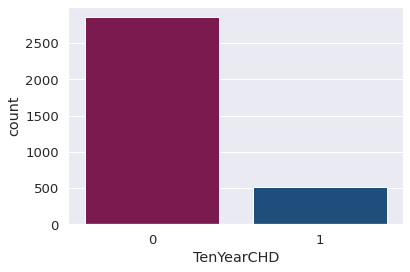

In [23]:
# Count plot for dependent variable
sns.set(font_scale = 1.2)
sns.countplot(data = df, x = 'TenYearCHD',palette= color[i[0]])

Text(0.5, 1.0, 'Education percenatge')

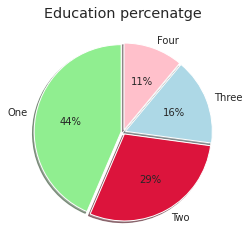

In [26]:
# Pie chart
one,two,three,four = df['education'].value_counts()
total = one+two+three+four
edu_list = [one/total,two/total,three/total,four/total]
plt.pie(edu_list,labels=['One','Two','Three','Four'],colors = ['lightgreen','crimson','lightblue','pink'],
        explode = [0.025,0.025,0.025,0.025],radius=1,startangle=90,textprops={'fontsize': 10},autopct='%0.0f%%',shadow = True)
plt.title('Education percenatge')

Text(0.5, 1.0, 'Cigarattes consumed')

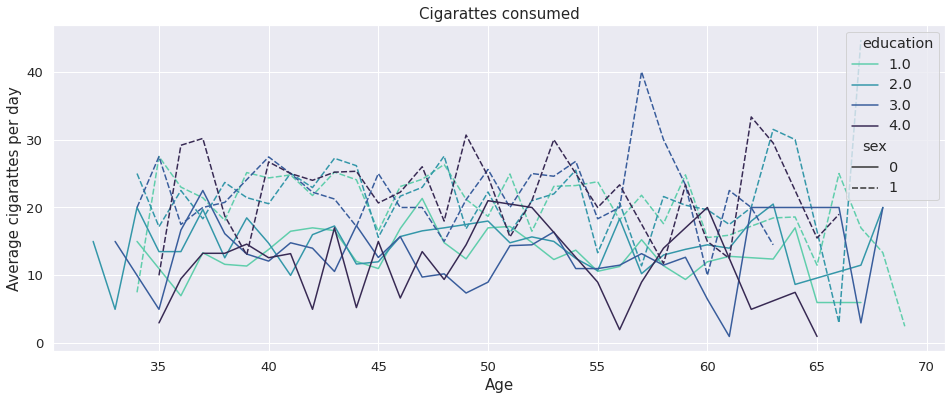

In [27]:
# Line plot for Cigarattes consumed

# Smoking patients are grouped by 'age', 'education', 'sex' to take mean of Cigarettes consumed pre day
df_line_plot = df[df['is_smoking']==1].groupby(['age','education','sex']).agg({'cigsPerDay':'mean'}).reset_index()
# df_line_plot

#Plotting Cigarette per day  for each Age
palette = sns.color_palette("mako_r", 4)
plt.figure(figsize = (16,6))
sns.lineplot(data = df_line_plot, x = 'age', y = 'cigsPerDay',hue = 'education',style = 'sex',palette=palette)
plt.xlabel('Age',fontsize=15)
plt.ylabel('Average cigarattes per day',fontsize=15)
plt.title('Cigarattes consumed',fontsize=15)

In [28]:
# Average of numeric independent variables with dependent variable
# Calculating the differnce in average values of 'col_lst' variables with Smoking and Non Smoking patients.
no_risk_avg_lst = []
risk_avg_lst = []
col_lst = ['totChol','age','cigsPerDay','BMI','sysBP','heartRate','glucose','diaBP']
xticks_lst = ['Total cholesterol level','Age','Cigarette per day','BMI','Systolic blood pressure ','Heart Rate','Glucose',' Diastolic blood pressure']

for col in col_lst:
  no_risk_avg = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(no_risk_avg.iloc[0,1])
  no_risk_avg_lst.append(round(no_risk_avg.iloc[0,1],2))
  risk_avg = df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({col:'mean'}).reset_index()
  # print(risk_avg.iloc[0,1])
  risk_avg_lst.append(round(risk_avg.iloc[0,1],2))
# print(no_risk_avg_lst)
# print(risk_avg_lst)

In [29]:
# Function for bar plot
def barplot(bar1_lists,bar2_lists,col_lst,bar1_color,bar2_color,bar1_label,bar2_label,xlabel,ylabel,title,xticks_lst):
  bar1_list = bar1_lists
  bar2_list = bar2_lists

  width_of_RandA_rooms = 0.3
  bar1 = np.arange(len(col_lst))
  bar2 = [i + width_of_RandA_rooms for i in bar1]

  plt.figure(figsize= (13,8))
  plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = bar1_color, label = bar1_label)
  plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = bar2_color, label = bar2_label)
  plt.xlabel(xlabel,fontsize = 15)
  plt.ylabel(ylabel,fontsize = 15)
  plt.title(title,fontsize = 15)
  plt.xticks(bar1+width_of_RandA_rooms/2,xticks_lst,fontsize = 10)
  plt.legend()
  plt.show()

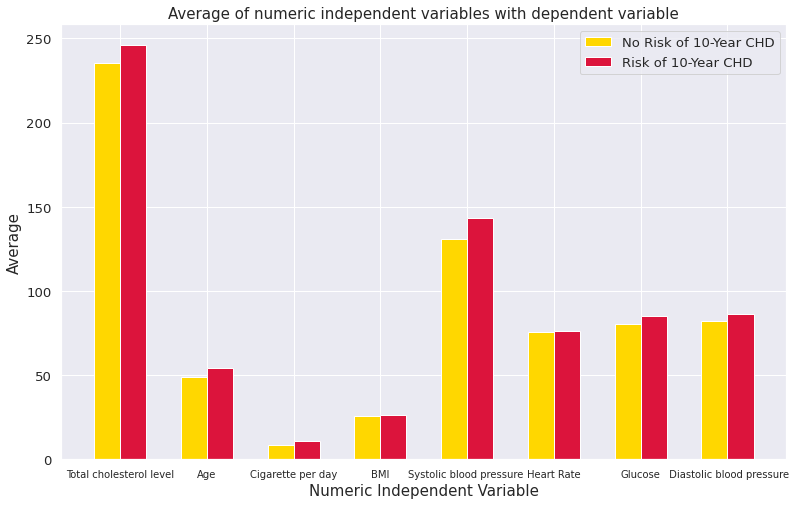

In [30]:
# Plotting
barplot(no_risk_avg_lst,risk_avg_lst,col_lst,'gold','crimson','No Risk of 10-Year CHD','Risk of 10-Year CHD',
        'Numeric Independent Variable','Average','Average of numeric independent variables with dependent variable',xticks_lst)

In [31]:
# Count of Categorical independent variables with dependent variable
# Calculating the differnce in counts of 'col_lsts' variables with Smoking and Non Smoking patients.

no_risk_avg_lsts = []
risk_avg_lsts = []
col_lsts = ['is_smoking','BPMeds','prevalentStroke','prevalentHyp','diabetes']
xticks_lsts = ['Blood Pressure Medication','Is Smoking','Previously had a stroke ','Diabetes','Patient was Hypertensive']

for cols in col_lsts:
  no_risk_avgs = df[df['TenYearCHD'] == 0].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(no_risk_avgs.iloc[0,1])
  no_risk_avg_lsts.append(round(no_risk_avgs.iloc[0,1],2))
  risk_avgs= df[df['TenYearCHD'] == 1].groupby('TenYearCHD').agg({cols:'count'}).reset_index()
  # print(risk_avgs.iloc[0,1])
  risk_avg_lsts.append(round(risk_avgs.iloc[0,1],2))
# print(no_risk_avg_lsts)
# print(risk_avg_lsts)

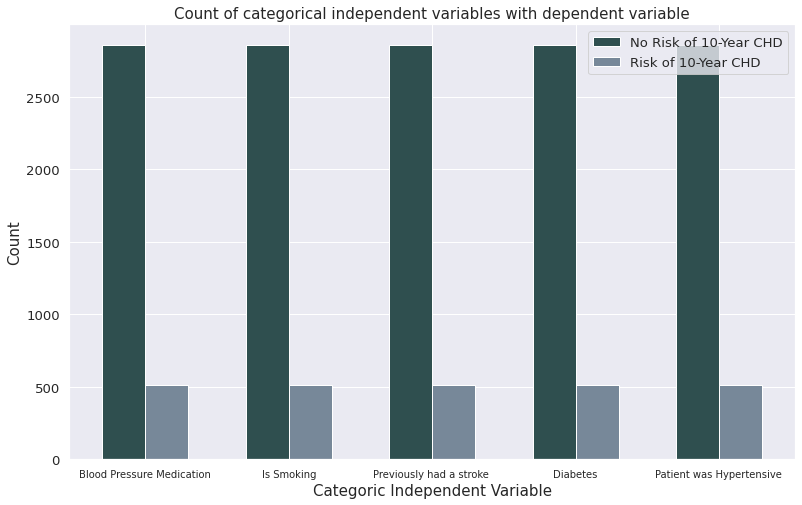

In [32]:
# Plotting
barplot(no_risk_avg_lsts,risk_avg_lsts,col_lsts,'darkslategray','lightslategray','No Risk of 10-Year CHD',
        'Risk of 10-Year CHD','Categoric Independent Variable','Count','Count of categorical independent variables with dependent variable',xticks_lsts)

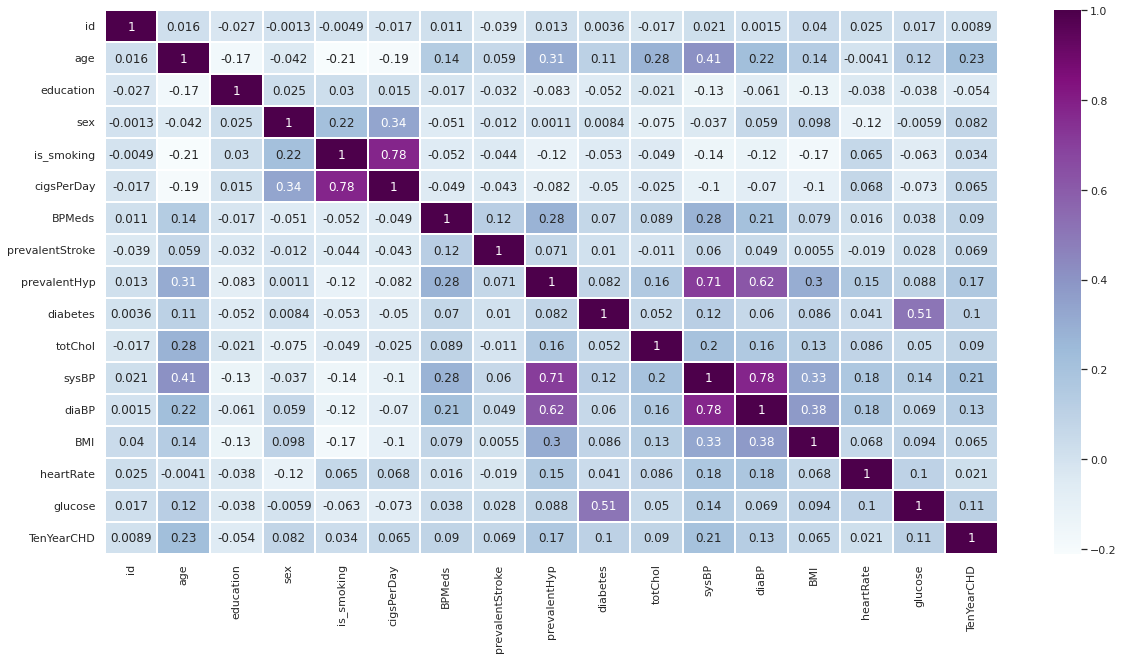

In [33]:
# Multicolinearity

plt.figure(figsize = (20, 10))
df_co_relation = df.corr()
# print(df_co_relation)
sns.set(font_scale = 1)
sns.heatmap(df_co_relation, annot = True, linewidths = 1,cmap = 'BuPu')
plt.show()

In [34]:
# Varinace Inflation Factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [35]:
calc_vif(df[[i for i in df.describe().columns if i not in ['id','TenYearCHD']]])

,variables,VIF
0,age,42.666037
1,education,4.615340
2,sex,2.155686
3,is_smoking,5.200391
4,cigsPerDay,4.519465
5,BPMeds,1.162028
6,prevalentStroke,1.029232
7,prevalentHyp,2.507379
8,diabetes,1.337928
9,totChol,33.478899


In [36]:
# Creating instances for Independent and Dependent variables
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']

print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [37]:
# Train test split
X = df[independent_variables].values
y = df[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
print('X_train :',X_train.shape)
print('X_test  :',X_test.shape)
print('y_train :',y_train.shape)
print('y_test  :',y_test.shape)

X_train : (2523, 15)
X_test  : (842, 15)
y_train : (2523, 1)
y_test  : (842, 1)


In [38]:
# Transforming data

# Standardization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [39]:
# Logistic Regression
# Creating an instance of Logistic Regression
logistic = LogisticRegression(fit_intercept = True)

# Hyperparameters
grid = {'C':10.0**np.arange(-2,3),'penalty':['l1','l2']}

# KFold
cv = KFold(n_splits = 5, random_state = None, shuffle = False)

# Grid Search
clf = GridSearchCV(logistic,grid,cv = cv,n_jobs = -1,scoring = 'f1_macro')

In [40]:
# Model fit
clf.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [41]:
# Get the predicted probabilities
train_proba_preds = clf.predict_proba(X_train)[:,1]
test_proba_preds = clf.predict_proba(X_test)[:,1]

In [42]:
# Get the predicted classes
train_class_preds = clf.predict(X_train)
test_class_preds = clf.predict(X_test)

In [43]:
# Function for Accuracy scores
def accuracy_scoress(actual_train,predicted_train,actual_test,predicted_test):
  train_accuracy = (accuracy_score(actual_train,predicted_train))*100
  test_accuracy = (accuracy_score(actual_test,predicted_test))*100

  print("The accuracy on train data is :", round(train_accuracy,5))
  print("The accuracy on test data is  :", round(test_accuracy,5))

In [44]:
# Get the accuracy scores
accuracy_scoress(y_train,train_class_preds,y_test,test_class_preds)

The accuracy on train data is : 85.73127
The accuracy on test data is  : 85.03563


In [45]:
# Here the accuracy score may be good. But for the imbalanced dataset ROC AUC score would be the appropriate metric

In [46]:
# Function for evaluation
def evaluation(actual_train,predicted_train_prob,actual_test,predicted_test_prob,predicted_train,predicted_test):
  # Get the 'ROC AUC' and 'Precision Recall' scores

  # ROC AUC
  train_roc_auc_score = roc_auc_score(actual_train,predicted_train_prob)
  test_roc_auc_score = roc_auc_score(actual_test,predicted_test_prob)

  print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
  print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

  # Precision Recall curve

  precision_train, recall_train,_train = precision_recall_curve(actual_train,predicted_train_prob)
  precision, recall,_ = precision_recall_curve(actual_test,predicted_test_prob)
    
  # print(_)
  auc_score_train = auc(recall_train, precision_train)
  auc_score = auc(recall, precision)
  print("The Precision Recall score on train data is :", round(auc_score_train,5))
  print("The Precision Recall score on test data is  :", round(auc_score,5))

  # Classification Report
  print(classification_report(actual_test,predicted_test))


  # Presicion Recall curve

  # plotting    
  plt.figure(figsize=(10,7))
  plt.plot(precision, recall, linestyle='--',color='crimson',label = ((f'Class 1, AUC= {round(auc_score,5)}')))
  plt.title('Presicion Recall curve')
  plt.xlabel('Recall')
  plt.ylabel('Presicion')
  plt.legend(loc='best')


The ROC AUC score on train data is          : 0.72941
The ROC AUC score on test data is           : 0.73401
The Precision Recall score on train data is : 0.33345
The Precision Recall score on test data is  : 0.39415
              precision    recall  f1-score   support

           0       0.85      1.00      0.92       706
           1       0.86      0.09      0.16       136

    accuracy                           0.85       842
   macro avg       0.85      0.54      0.54       842
weighted avg       0.85      0.85      0.80       842



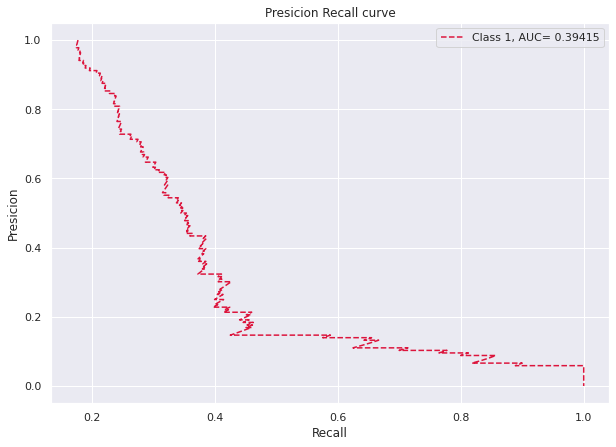

In [47]:
# Evaluation 
evaluation(y_train,train_proba_preds,y_test,test_proba_preds,train_class_preds,test_class_preds)

In [48]:
# Function for confusion matrix
def conf_mat(actual_train,predicted_train,actual_test,predicted_test):
    # Confusion matrix for train and test datasets.

  plt.figure(figsize = (10,20))
  sns.set_theme()
  var_lsts= [actual_train,predicted_train,actual_test,predicted_test]

  for var in enumerate(var_lsts):
    if var[0] == 0:
      ax  = plt.subplot(5,2,1)
      cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
      print('Train Confusion Matrix :')
      print(cm)
      sns.heatmap(cm, annot=True,ax = ax,cmap="Blues") #annot=True to annotate cells
      labels = ['no risk of CHD', 'risk of CHD']
      ax.set_xlabel('Predicted labels')
      ax.set_ylabel('True labels')
      ax.set_title('Confusion Matrix of Train dataset')
      ax.xaxis.set_ticklabels(labels)
      ax.yaxis.set_ticklabels(labels)
      sns.set(font_scale = 1)
    elif var[0] == 2:
      ax = plt.subplot(5,2,2)
      cm = confusion_matrix(var_lsts[var[0]],var_lsts[var[0] +1])
      print('Test Confusion Matrix :')
      print(cm)
      sns.heatmap(cm, annot=True,cmap="BuPu") #annot=True to annotate cells
      labels = ['no risk of CHD', 'risk of CHD']
      ax.set_xlabel('Predicted labels')
      ax.set_ylabel('True labels')
      ax.set_title('Confusion Matrix of Test dataset')
      ax.xaxis.set_ticklabels(labels)
      ax.yaxis.set_ticklabels(labels)
      sns.set(font_scale = 1)

Train Confusion Matrix :
[[2141    9]
 [ 351   22]]
Test Confusion Matrix :
[[704   2]
 [124  12]]


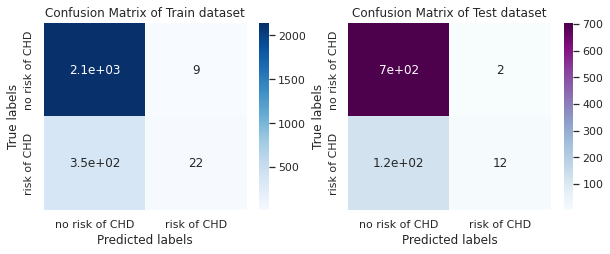

In [49]:
# Confusion Matrix
conf_mat(y_train,train_class_preds,y_test, test_class_preds)

In [50]:
# Observations from Confusion Matrix of test dataset
# True Negative(TN) = Persons who dont have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# True Positive(TP) = Persons who have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
# False Negative(FN) = Persons who have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# False Positive(FP) = Persons who dont have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
cm = confusion_matrix(y_test,test_class_preds)
print('True Negative  :',cm[0][0])
print('False Positive :',cm[0][1])
print('False Negative :',cm[1][0])
print('True Positive  :',cm[1][1])
# Precision - shows how correct the model is, when it predicts that a person has a risk of 10-year CHD.
Precision = (cm[1][1]/(cm[1][1]+cm[0][1])) *100
print('Precision      :',round(Precision,1),'%')
# 
# Recall - for all presons who have a risk of 10-year CHD, how many the model have correctly predicted as having a risk of 10-year CHD.
Recall = (cm[1][1]/(cm[1][1]+cm[1][0])) *100
print('Recall         :',round(Recall,1),'%')

True Negative  : 704
False Positive : 2
False Negative : 124
True Positive  : 12
Precision      : 85.7 %
Recall         : 8.8 %


In [51]:
# ROC Curve would be meaningless for Imbalanced dataset
# ROC Curve --> True_positive_rate vs False_positive_rate
# True_positive_rate = True_positive/(True_positive + False_negative)
# False_positive_rate = False_positive/(False_positive + True_negative)
# For an Imbalanced dataset True_negative would be always high, if the majority class is 0. So we always get less False_positive_rate.
# Presicion Recall curves would be appropriate for Imbalanced dataset.

In [52]:
# In the given case 
# A person with a risk of 10-year CHD cannot be classified as 'No risk of 10-year CHD'
# In our test dataset, cm[1][0] have a risk of 10-year CHD but our model predicted only cm[1][1] have a risk of 10-year CHD which is only 8%.
# Applying Logistic Regression on original dataset, the desired Recall is not acheived.

In [53]:
# Dataset, 'data' is used for DesicionTree models because Desicion Tree models are robust to outliers

In [54]:
data.shape

(3390, 17)

In [55]:
# Replacing 'M' with 1 and 'F' with 0 in 'sex' variable

data['sex'] = data['sex'].apply(lambda x: 1 if x == 'M' else 0)

# Replacing 'YES' with 1 and 'NO' with 0 in 'is_smoking' variable

data['is_smoking'] = data['is_smoking'].apply(lambda x: 1 if x == 'YES' else 0)

In [56]:
# Treating NULL values
# 'education'
data['education'].fillna(0,inplace = True)
data.groupby('education').agg({'age':'mean'})
# print(data.groupby('education').agg({'age':'mean'}))
# From this we can replace education '0' with '1' because based on the age the education varies.
data['education'] = data['education'].apply(lambda x : 1 if x == 0 else x)

# 'cigsPerDay'
data[data['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'})
# print(data[data['is_smoking'] == 1].groupby('sex').agg({'cigsPerDay':'mean'}))
# As the average number of cigarettes consumed by Females is 14 and Males is 22
# So replacing null values with 14 for smoking female patients and 22 for smoking male patients.
data.loc[ (data.sex == 0) & (data['cigsPerDay'].isna()), 'cigsPerDay'] =  14
data.loc[ (data.sex == 1) & (data['cigsPerDay'].isna()), 'cigsPerDay'] =  22

# 'totChol'
data['totChol'].fillna(int(data['totChol'].mean()), inplace = True)

# 'BMI'
data['BMI'].fillna(int(data['BMI'].mean()), inplace = True)

# 'Heart rate'
data['heartRate'].fillna(int(data['heartRate'].mean()), inplace = True)


# 'glucose'
data.groupby('diabetes').agg({'glucose':'mean'})
# print(data.groupby('diabetes').agg({'glucose':'mean'}))
# Average Glucose level of Patients without Diabetes is 79 and with Diabetes is 172
# So replacing null values with 79 for patients without diabetes and 172 for patients with diabetes.
data.loc[ (data.diabetes == 0) & (data['glucose'].isna()), 'glucose'] =  79
data.loc[ (data.diabetes == 1) & (data['glucose'].isna()), 'glucose'] =  172

# 'BPMeds'
data.loc[(data.prevalentHyp == 1) & (data['BPMeds'].isna()), 'BPMeds'] =  1

In [57]:
# Droping the rows with 'BPMeds' as Nan value
data = data.dropna()
data.shape

(3365, 17)

In [58]:
# Creating instances for Independent and Dependent variables
independent_variables = df.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [59]:
# Train test split
X = data[independent_variables].values
y = data[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
# print('X_train :',X_train.shape)
# print('X_test  :',X_test.shape)
# print('y_train :',y_train.shape)
# print('y_test  :',y_test.shape)

In [60]:
# Transforming data

# Standardization
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)

In [61]:
# DesicionTreeclassifier

dt_classifier = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=5, random_state=0)

In [62]:
# Get the predicted probabilities
train_proba_preds = dt_classifier.predict_proba(X_train)[:,1]
test_proba_preds = dt_classifier.predict_proba(X_test)[:,1]

In [63]:
# Get the Predicted classes
y_train_dt_predict = dt_classifier.predict(X_train)
y_test_dt_predict= dt_classifier.predict(X_test)

In [64]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_dt_predict,y_test,y_test_dt_predict)

The accuracy on train data is : 85.652
The accuracy on test data is  : 83.96675


The ROC AUC score on train data is          : 0.68958
The ROC AUC score on test data is           : 0.64832
The Precision Recall score on train data is : 0.35236
The Precision Recall score on test data is  : 0.28791
              precision    recall  f1-score   support

           0       0.85      0.99      0.91       706
           1       0.53      0.07      0.12       136

    accuracy                           0.84       842
   macro avg       0.69      0.53      0.51       842
weighted avg       0.79      0.84      0.78       842



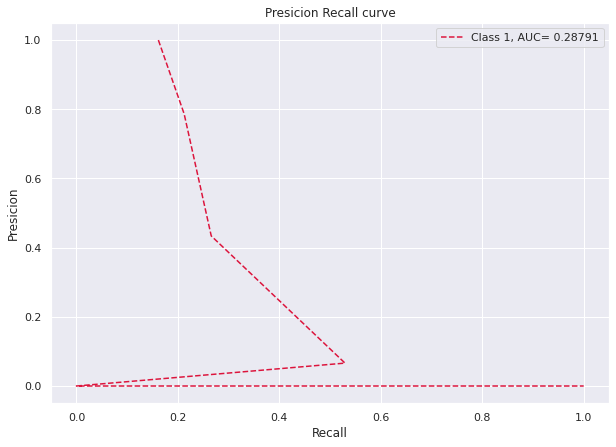

In [65]:
# Evaluation 
evaluation(y_train,train_proba_preds,y_test,test_proba_preds,y_train_dt_predict,y_test_dt_predict)

Train Confusion Matrix :
[[2138   12]
 [ 350   23]]
Test Confusion Matrix :
[[698   8]
 [127   9]]


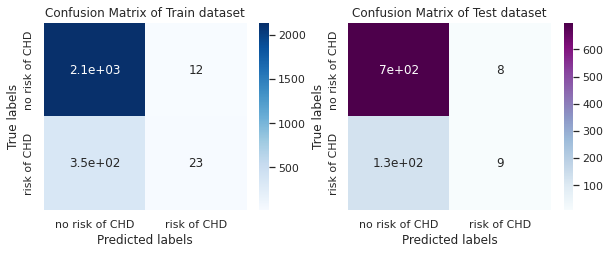

In [66]:
# Confusion Matrix
conf_mat(y_train,y_train_dt_predict,y_test, y_test_dt_predict)

In [67]:
# Observations from Confusion Matrix of test dataset
# True Negative(TN) = Persons who dont have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# True Positive(TP) = Persons who have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
# False Negative(FN) = Persons who have a risk of 10-year CHD, and our model predicted that they dont have a risk of 10-year CHD.
# False Positive(FP) = Persons who dont have a risk of 10-year CHD, and our model predicted that they have a risk of 10-year CHD.
cm = confusion_matrix(y_test,y_test_dt_predict)
print('True Negative  :',cm[0][0])
print('False Positive :',cm[0][1])
print('False Negative :',cm[1][0])
print('True Positive  :',cm[1][1])
# Precision - shows how correct the model is, when it predicts that a person has a risk of 10-year CHD.
Precision = (cm[1][1]/(cm[1][1]+cm[0][1])) *100
print('Precision      :',round(Precision,1),'%')
# 
# Recall - for all presons who have a risk of 10-year CHD, how many the model have correctly predicted as having a risk of 10-year CHD.
Recall = (cm[1][1]/(cm[1][1]+cm[1][0])) *100
print('Recall         :',round(Recall,1),'%')

True Negative  : 698
False Positive : 8
False Negative : 127
True Positive  : 9
Precision      : 52.9 %
Recall         : 6.6 %


In [68]:
# Ensemble techniques of Desicion Tree

In [69]:
# RandomForestClassifer

# Number of trees
# n_estimators = [100,150,170]
n_estimators = [100]

# Maximum depth of trees
# max_depth = [5,15,20]
max_depth = [15]

# Minimum number of samples required to split a node
# min_samples_split = [50,80,100]
min_samples_split = [80]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [20,40,60]
min_samples_leaf = [20]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

# class_weight = dict({0:1,1:2})

In [70]:
# Create an instance of the RandomForestClassifier
rfc_model = RandomForestClassifier(random_state = 0)

# Grid search
rfc_grid = GridSearchCV(estimator=rfc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

In [71]:
# Model fit
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.3s
[CV] END max_depth=15, min_samples_leaf=20, min_samples_split=80, n_estimators=100; total time=   0.3s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [15], 'min_samples_leaf': [20],
                         'min_samples_split': [80], 'n_estimators': [100]},
             scoring='roc_auc', verbose=2)

In [72]:
rfc_optimal_model = rfc_grid.best_estimator_

In [73]:
# Best Parameters
rfc_grid.best_params_

{'max_depth': 15,
 'min_samples_leaf': 20,
 'min_samples_split': 80,
 'n_estimators': 100}

In [74]:
# Get the predicted probabilities
train_proba_preds = rfc_optimal_model.predict_proba(X_train)[:,1]
test_proba_preds = rfc_optimal_model.predict_proba(X_test)[:,1]

In [75]:
# Get the Predicted classes

y_train_predict_rfc_cv = rfc_optimal_model.predict(X_train)
y_test_predict_rfc_cv = rfc_optimal_model.predict(X_test)

In [76]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_predict_rfc_cv,y_test,y_test_predict_rfc_cv)

The accuracy on train data is : 85.21601
The accuracy on test data is  : 83.84798


The ROC AUC score on train data is          : 0.80987
The ROC AUC score on test data is           : 0.70574
The Precision Recall score on train data is : 0.43966
The Precision Recall score on test data is  : 0.32739
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       706
           1       0.00      0.00      0.00       136

    accuracy                           0.84       842
   macro avg       0.42      0.50      0.46       842
weighted avg       0.70      0.84      0.76       842



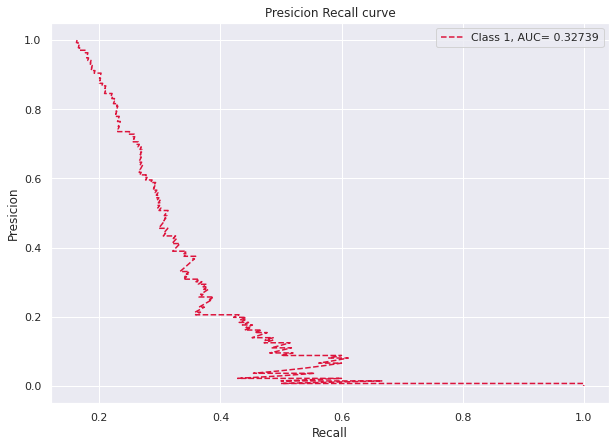

In [77]:
# Evaluation 
evaluation(y_train,train_proba_preds,y_test,test_proba_preds,y_train_predict_rfc_cv,y_test_predict_rfc_cv)

Train Confusion Matrix :
[[2150    0]
 [ 373    0]]
Test Confusion Matrix :
[[706   0]
 [136   0]]


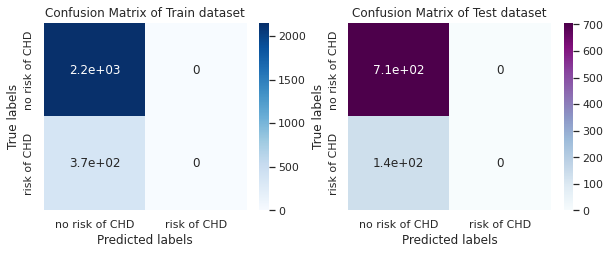

In [78]:
# Confusion Matrix
conf_mat(y_train,y_train_predict_rfc_cv,y_test, y_test_predict_rfc_cv)

In [79]:
# Desired Precision Recall AUC scores are not acheived on Logistic Regressor, Desicion Tree and Ensemble Techniques of Desicion Tree
# because of Class Imbalance
# Sampling techniques are applied on original dataset to encounter class imbalance then dataset will be feed to the models

In [80]:
# Class Imbalance is the problem of classification when there is an unequal distribution of classes in the dataset

In [81]:
# Class Imbalnce
NO_risk_of_CHD,risk_of_CHD = df['TenYearCHD'].value_counts()
total_observations = NO_risk_of_CHD + risk_of_CHD
no_risk_precent = round((NO_risk_of_CHD/(NO_risk_of_CHD + risk_of_CHD)) *100,2)
risk_precent = round((risk_of_CHD/(NO_risk_of_CHD + risk_of_CHD)) *100,2)
print('No Risk of 10-Year CHD: ',no_risk_precent,'%')
print('Risk of 10-Year CHD: ',risk_precent,'%')

No Risk of 10-Year CHD:  84.87 %
Risk of 10-Year CHD:  15.13 %


In [82]:
# Only 15% percent of the Pateints are having a Risk of 10-year CHD.

In [83]:
# Desired ROC AUC scores are not acheived by appling original dataset in the models.

In [84]:
# Random Under Sampling

# Creating an instance of Random Under Sampler
rus = RandomUnderSampler(random_state = 234)

X_rus,y_rus = rus.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])
# print(X_rus.shape)
# print(y_rus.shape)

rus_x = pd.DataFrame(X_rus)
rus_y = pd.DataFrame(y_rus)
rus_xy = pd.concat([rus_x,rus_y], axis = 1)
# rus_xy

# Equal number of classes after Under sampling
rus_xy['TenYearCHD'].value_counts()

0    509
1    509
Name: TenYearCHD, dtype: int64

In [85]:
# Synthetic Minority Oversampling Technique

# Creating an instance of Random Under Sampler
smote = SMOTE(sampling_strategy=1,random_state = 0,k_neighbors=5)

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

xy_smote = pd.concat([X_smote,y_smote],axis = 1)
# xy_smote.head()

# Equal number of classes after Under sampling
xy_smote['TenYearCHD'].value_counts()

Original dataset shape 3365
Resampled dataset shape 5712


1    2856
0    2856
Name: TenYearCHD, dtype: int64

In [86]:
# SMOTETomek Over sampling

# Creating an instance of Random Under Sampler
smotetomek = SMOTETomek(sampling_strategy='auto',random_state = 0)

# fit predictor and target variable
X_smotetomek, y_smotetomek = smotetomek.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])

print('Original dataset shape', len(data))
print('Resampled dataset shape', len(y_smote))

xy_smotetomek = pd.concat([X_smotetomek,y_smotetomek],axis = 1)
# xy_smotetomek.head()

# Equal number of classes after Under sampling
xy_smotetomek['TenYearCHD'].value_counts()

Original dataset shape 3365
Resampled dataset shape 5712


1    2816
0    2816
Name: TenYearCHD, dtype: int64

In [87]:
# Random under sampling had been tried with all the below models, but it leads to the huge information loss and ROC AUC score is not improved.
# SMOTE, SMOTETomek had been tried with all the below models, but Random Over Sampling was found to be more effective.
# Random Over Sampling is found to be one of the effective technique to handle imbalanced data.

In [88]:
# Random Over Sampling
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(sampling_strategy= 1.0,random_state = 0)
X_ros,y_ros = ros.fit_resample(data.iloc[:,0:-1], data['TenYearCHD'])
print('X ros :',X_ros.shape)
print('y ros :',y_ros.shape)

X ros : (5712, 16)
y ros : (5712,)


In [89]:
# Concating two data frames
ros_x = pd.DataFrame(X_ros)
ros_y = pd.DataFrame(y_ros)
ros_xy = pd.concat([ros_x,ros_y], axis = 1)
# ros_xy.head()

In [90]:
# Classes after sampling
ros_xy['TenYearCHD'].value_counts()

1    2856
0    2856
Name: TenYearCHD, dtype: int64

In [91]:
# Creating instances for Independent and Dependent variables
independent_variables = data.columns.tolist()
independent_variables.remove('id')
independent_variables.remove('TenYearCHD')

dependent_variable = ['TenYearCHD']
print('Independent variables : ',independent_variables)
print('Dependent variables   : ',dependent_variable)

Independent variables :  ['age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
Dependent variables   :  ['TenYearCHD']


In [92]:
# Feature Selection
X_ros = ros_xy[independent_variables]
y_ros = ros_xy[dependent_variable]

# Fit
bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X_ros,y_ros)

# DataFrames for scores and columns
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X_ros.columns)

# Concating DataFrames
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']
featureScores.sort_values(by = 'Score',ascending = False,inplace = True)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

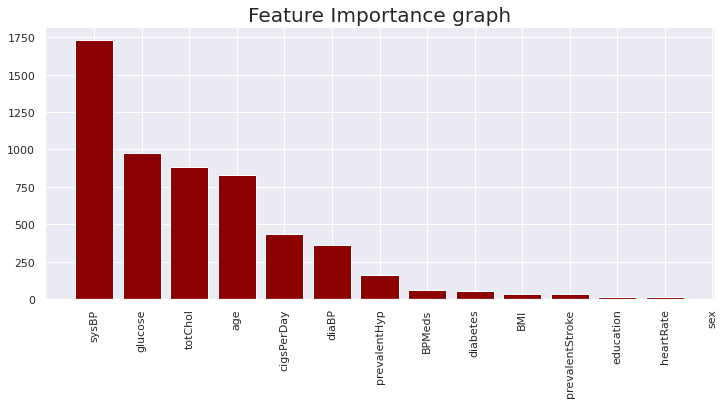

In [93]:
# Visualization of feature importance
plt.figure(figsize = (12,5))
sns.set(font_scale = 1)
plt.bar(featureScores['Specs'],featureScores['Score'],color ='darkred')
plt.title('Feature Importance graph',fontsize = 20)
plt.xticks(rotation=90)

In [94]:
# All the above features contribute well to the target variable
# So none of the features are removed

In [95]:
# Train test split
X_ros = ros_xy[independent_variables].values
y_ros = ros_xy[dependent_variable].values

X_train, X_test, y_train, y_test = train_test_split(X_ros,y_ros,test_size = 0.33,random_state = 0)

In [96]:
# Logistic Regression on Random Over sampled data

# Create an instance of the LogisticRegression
log_reg = LogisticRegression()

# Hyperparmeters
grid = {'C': 10.0**np.arange(-5,1),'penalty':['l1','l2']}
cv = KFold(n_splits = 6,random_state = None,shuffle = False)

# Grid Search
log_classifier = GridSearchCV(log_reg,grid,cv=cv,n_jobs = -1,scoring = 'f1_macro')

In [97]:
# Model Fit
log_classifier.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=6, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [98]:
# Get the predicted probabilities
y_train_log_proba_preds = log_classifier.predict_proba(X_train)[:,1]
y_test_log_proba_preds = log_classifier.predict_proba(X_test)[:,1]

In [99]:
# Get the Predicted classes
y_train_log_predict = log_classifier.predict(X_train)
y_test_log_predict = log_classifier.predict(X_test)

In [100]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_log_predict,y_test,y_test_log_predict)

The accuracy on train data is : 65.69114
The accuracy on test data is  : 64.72149


The ROC AUC score on train data is          : 0.71434
The ROC AUC score on test data is           : 0.69948
The Precision Recall score on train data is : 0.70048
The Precision Recall score on test data is  : 0.68614
              precision    recall  f1-score   support

           0       0.64      0.66      0.65       935
           1       0.66      0.63      0.64       950

    accuracy                           0.65      1885
   macro avg       0.65      0.65      0.65      1885
weighted avg       0.65      0.65      0.65      1885



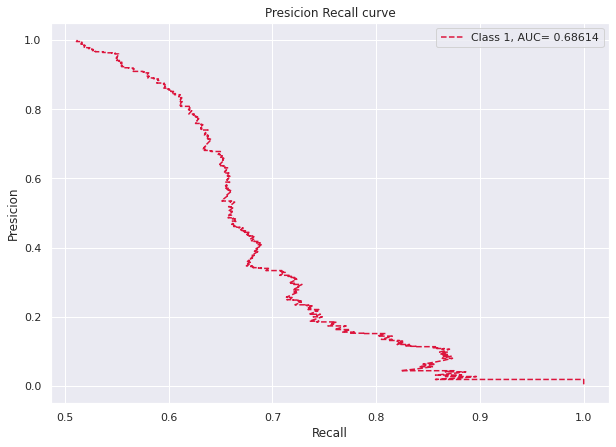

In [101]:
# Evaluation 
evaluation(y_train,y_train_log_proba_preds,y_test,y_test_log_proba_preds,y_train_log_predict,y_test_log_predict)

Train Confusion Matrix :
[[1319  602]
 [ 711 1195]]
Test Confusion Matrix :
[[621 314]
 [351 599]]


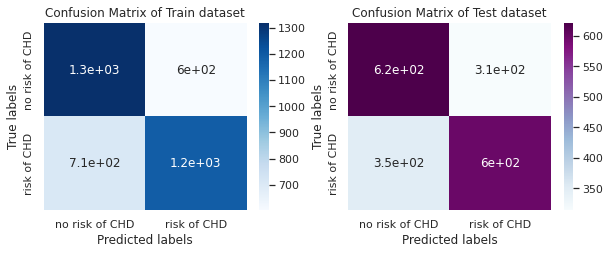

In [102]:
# Confusion Matrix
conf_mat(y_train,y_train_log_predict,y_test, y_test_log_predict)

In [103]:
# Ensembles of Desicion Tree

In [104]:
# Ensembling techniques
# Random Forest Classifer on Random Over sampled data

# Number of trees
# n_estimators = [50,100,150]
n_estimators = [100]

# Maximum depth of trees
# max_depth = [10,20,40]
max_depth = [22]

# Minimum number of samples required to split a node
# min_samples_split = [4,6,8]
min_samples_split = [4]

# Minimum number of samples required at each leaf node
# min_samples_leaf = [3,5,7]
min_samples_leaf = [3]

# Hyperparameters Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}

In [105]:
# Create an instance of the RandomForestClassifier
rfc_model = RandomForestClassifier(criterion = 'gini',class_weight = {0:1,1:1.5},random_state = 0)

# By adding weights to Class 1, False Negative can be reduced

# Grid search
rfc_grid = GridSearchCV(estimator=rfc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='f1_macro')

In [106]:
# Model Fit
rfc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.5s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s
[CV] END max_depth=22, min_samples_leaf=3, min_samples_split=4, n_estimators=100; total time=   0.4s


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 1.5},
                                              random_state=0),
             param_grid={'max_depth': [22], 'min_samples_leaf': [3],
                         'min_samples_split': [4], 'n_estimators': [100]},
             scoring='f1_macro', verbose=2)

In [107]:
rfc_optimal_model = rfc_grid.best_estimator_
print(rfc_grid.best_params_)

{'max_depth': 22, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 100}


In [108]:
# Get predicted probability
y_train_proba_preds_rfc_cv = rfc_optimal_model.predict_proba(X_train)[:,1]
y_test_proba_preds_rfc_cv = rfc_optimal_model.predict_proba(X_test)[:,1]

In [109]:
# Get predicted classes
y_train_predict_rfc_cv = rfc_optimal_model.predict(X_train)
y_test_predict_rfc_cv = rfc_optimal_model.predict(X_test)

In [110]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_predict_rfc_cv,y_test,y_test_predict_rfc_cv)

The accuracy on train data is : 99.05932
The accuracy on test data is  : 89.33687


The ROC AUC score on train data is          : 0.99948
The ROC AUC score on test data is           : 0.97413
The Precision Recall score on train data is : 0.99952
The Precision Recall score on test data is  : 0.97841
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       935
           1       0.86      0.93      0.90       950

    accuracy                           0.89      1885
   macro avg       0.90      0.89      0.89      1885
weighted avg       0.90      0.89      0.89      1885



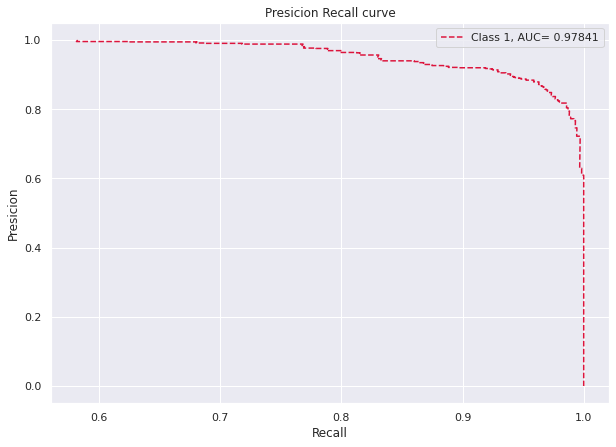

In [111]:
# Evaluation 
evaluation(y_train,y_train_proba_preds_rfc_cv,y_test,y_test_proba_preds_rfc_cv,y_train_predict_rfc_cv,y_test_predict_rfc_cv)

Train Confusion Matrix :
[[1900   21]
 [  15 1891]]
Test Confusion Matrix :
[[796 139]
 [ 62 888]]


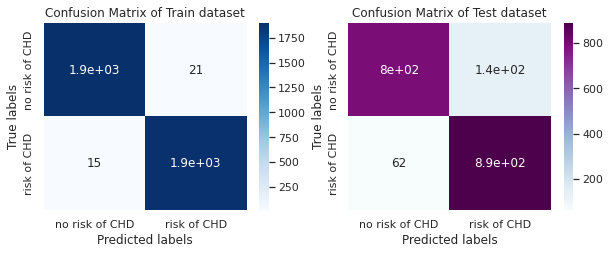

In [112]:
# Confusion Matrix
conf_mat(y_train,y_train_predict_rfc_cv,y_test, y_test_predict_rfc_cv)

In [113]:
# Gradient Boosting Classifier on Random Over Sampled data

In [114]:
# Number of trees
n_estimators = [200]
# n_estimators = [150,200,250]

# Maximum depth of trees
max_depth = [50]
# max_depth = [40,50,60]

# Minimum number of samples required to split a node
min_samples_split = [60]
# min_samples_split = [50,60,70]

# Minimum number of samples required at each leaf node
min_samples_leaf = [70]
# min_samples_leaf = [60,70,80]

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'min_samples_split' : min_samples_split,'min_samples_leaf' : min_samples_leaf}


In [115]:
# Create an instance of the RandomForestClassifier
gbc_model = GradientBoostingClassifier(random_state = 0)

# Grid search
gbc_grid = GridSearchCV(estimator=gbc_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

In [116]:
# Model Fit
gbc_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s
[CV] END max_depth=50, min_samples_leaf=70, min_samples_split=60, n_estimators=200; total time=   2.8s


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'max_depth': [50], 'min_samples_leaf': [70],
                         'min_samples_split': [60], 'n_estimators': [200]},
             scoring='roc_auc', verbose=2)

In [117]:
gbc_optimal_model = gbc_grid.best_estimator_

print(gbc_grid.best_params_)

{'max_depth': 50, 'min_samples_leaf': 70, 'min_samples_split': 60, 'n_estimators': 200}


In [118]:
# Get predicted probability
y_train_proba_preds_gbc_cv = gbc_optimal_model.predict_proba(X_train)[:,1]
y_test_proba_preds_gbc_cv = gbc_optimal_model.predict_proba(X_test)[:,1]

In [119]:
# Get the predicted classes

y_train_predict_gbc_cv = gbc_optimal_model.predict(X_train)
y_test_predict_gbc_cv = gbc_optimal_model.predict(X_test)

In [120]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_predict_gbc_cv,y_test,y_test_predict_gbc_cv)

The accuracy on train data is : 99.81709
The accuracy on test data is  : 93.1565


The ROC AUC score on train data is          : 0.99998
The ROC AUC score on test data is           : 0.97932
The Precision Recall score on train data is : 0.99998
The Precision Recall score on test data is  : 0.97744
              precision    recall  f1-score   support

           0       0.97      0.89      0.93       935
           1       0.90      0.97      0.93       950

    accuracy                           0.93      1885
   macro avg       0.94      0.93      0.93      1885
weighted avg       0.93      0.93      0.93      1885



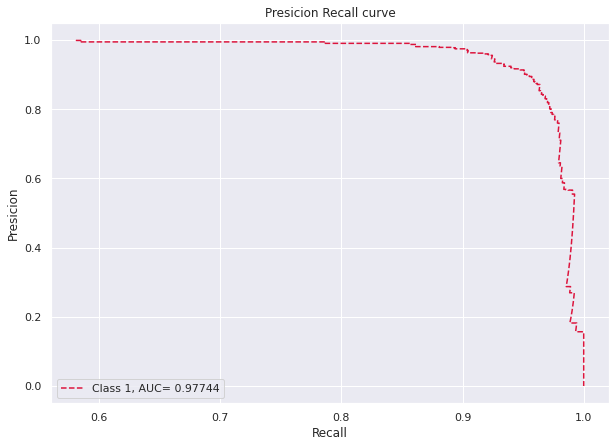

In [121]:
# Evaluation 
evaluation(y_train,y_train_proba_preds_gbc_cv,y_test,y_test_proba_preds_gbc_cv,y_train_predict_gbc_cv,y_test_predict_gbc_cv)

Train Confusion Matrix :
[[1917    4]
 [   3 1903]]
Test Confusion Matrix :
[[830 105]
 [ 24 926]]


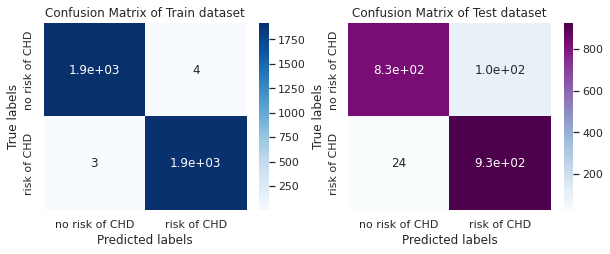

In [122]:
# Confusion Matrix
conf_mat(y_train,y_train_predict_gbc_cv,y_test, y_test_predict_gbc_cv)

In [123]:
# XGB Classifier on Random Over Sampled data

In [124]:
# Number of trees
# n_estimators = [200]
n_estimators = [100]

# Maximum depth of trees
# max_depth = [3,6,8,10]
max_depth = [10]

# Learning_rate
# learning_rate = [0.01,0.1,0.2]
learning_rate = [0.2]

# Minimum child weight
# min_child_weight = [1,5,10]
min_child_weight = [1]

# subsample 
# subsample = [0.5,0.7,0.9]
subsample = [0.5]

#gamma
# gamma = [1,5,8] 
gamma = [1]

# lambda
reg_lambda = [1]

# scale pos weight
scale_pos_weight = [6]
# class 0 --> 2856
# class 1 --> 509
# 2856/509 = 6

# Hyperparameter Grid
param_dict = {'n_estimators' : n_estimators,'max_depth' : max_depth,'learning_rate' : learning_rate,
              'min_child_weight' : min_child_weight,'subsample ' : subsample ,'gamma' : gamma,'reg_lambda' :reg_lambda }

In [125]:
# Create an instance of the RandomForestClassifier
xgb_model = XGBClassifier(random_state = 0,seed = 1)

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,param_grid = param_dict,cv = 5, verbose=2, scoring='roc_auc')

In [126]:
# Model Fit
xgb_grid.fit(X_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   1.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   1.3s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   1.2s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   1.1s
[CV] END gamma=1, learning_rate=0.2, max_depth=10, min_child_weight=1, n_estimators=100, reg_lambda=1, subsample =0.5; total time=   1.2s


GridSearchCV(cv=5, estimator=XGBClassifier(seed=1),
             param_grid={'gamma': [1], 'learning_rate': [0.2],
                         'max_depth': [10], 'min_child_weight': [1],
                         'n_estimators': [100], 'reg_lambda': [1],
                         'subsample ': [0.5]},
             scoring='roc_auc', verbose=2)

In [127]:
xgb_optimal_model = xgb_grid.best_estimator_

print(xgb_grid.best_params_)

{'gamma': 1, 'learning_rate': 0.2, 'max_depth': 10, 'min_child_weight': 1, 'n_estimators': 100, 'reg_lambda': 1, 'subsample ': 0.5}


In [128]:
# Get predicted probability
y_train_proba_preds_xgb_cv = xgb_optimal_model.predict_proba(X_train)[:,1]
y_test_proba_preds_xgb_cv = xgb_optimal_model.predict_proba(X_test)[:,1]

In [129]:
# Get the predicted classes
y_train_predict_xgb_cv = xgb_optimal_model.predict(X_train)
y_test_predict_xgb_cv = xgb_optimal_model.predict(X_test)

In [130]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_predict_xgb_cv,y_test,y_test_predict_xgb_cv)

The accuracy on train data is : 99.79096
The accuracy on test data is  : 91.56499


The ROC AUC score on train data is          : 0.99995
The ROC AUC score on test data is           : 0.97255
The Precision Recall score on train data is : 0.99995
The Precision Recall score on test data is  : 0.97338
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       935
           1       0.89      0.95      0.92       950

    accuracy                           0.92      1885
   macro avg       0.92      0.92      0.92      1885
weighted avg       0.92      0.92      0.92      1885



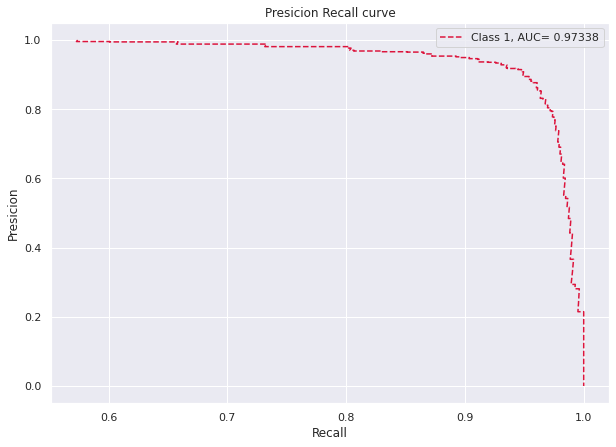

In [131]:
# Evaluation 
evaluation(y_train,y_train_proba_preds_xgb_cv,y_test,y_test_proba_preds_xgb_cv,y_train_predict_xgb_cv,y_test_predict_xgb_cv)

Train Confusion Matrix :
[[1919    2]
 [   6 1900]]
Test Confusion Matrix :
[[820 115]
 [ 44 906]]


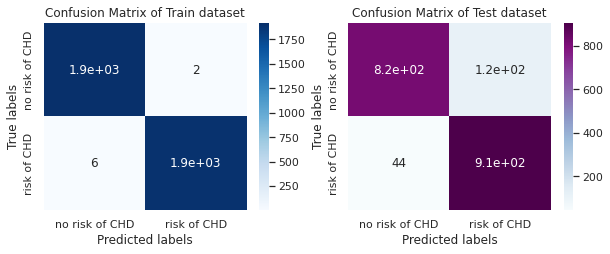

In [132]:
# Confusion Matrix
conf_mat(y_train,y_train_predict_xgb_cv,y_test, y_test_predict_xgb_cv)

In [133]:
# KNeighbors Classifier on Random Over Sampled Data

In [134]:
# Identifing the range of K values

In [135]:
#Setup arrays to store training and test accuracies
neighbors = np.arange(1,50)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test) 

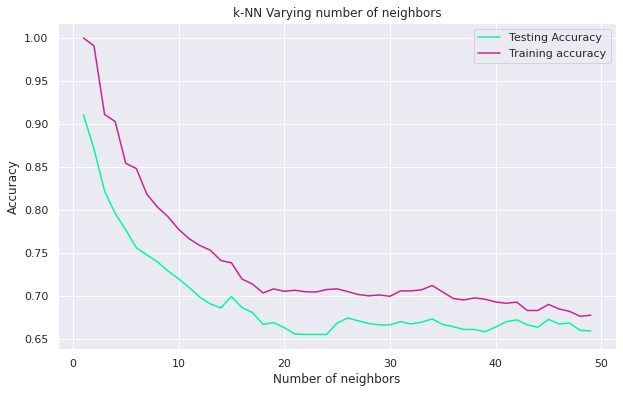

In [136]:
# Generate plot
plt.figure(figsize = (10,6))
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy',color = 'mediumspringgreen')
plt.plot(neighbors, train_accuracy, label='Training accuracy',color = '#D02090')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()
# '#e7b2ff','#89ffcc'

In [137]:
# KNeighborsClassifier

# From the graph we could able to get the best range of K value is between 5 and 20,
# Hyperparameter grid
# para = {'n_neighbors' : np.arange(1,100)}
para = {'n_neighbors' : np.arange(5,20)}

In [138]:
# Creating an instance of the KNeighborsClassifier

knn = KNeighborsClassifier(weights='uniform',p=2)

# GridSearch
knn_cv = GridSearchCV(knn,param_grid = para,cv =5)

In [139]:
# Model Fit
knn_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19])})

In [140]:
knn_optimal_model = knn_cv.best_estimator_

print(knn_cv.best_params_)

{'n_neighbors': 5}


In [141]:
# Get predicted probability
y_train_proba_preds_knn_cv = knn_cv.predict_proba(X_train)[:,1]
y_test_proba_preds_knn_cv = knn_cv.predict_proba(X_test)[:,1]

In [142]:
# Get the predicted classes

y_train_predict_knn_cv = knn_cv.predict(X_train)
y_test_predict_knn_cv = knn_cv.predict(X_test)

In [143]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_predict_knn_cv,y_test,y_test_predict_knn_cv)

The accuracy on train data is : 85.44552
The accuracy on test data is  : 77.71883


The ROC AUC score on train data is          : 0.95462
The ROC AUC score on test data is           : 0.85219
The Precision Recall score on train data is : 0.95932
The Precision Recall score on test data is  : 0.84561
              precision    recall  f1-score   support

           0       0.84      0.67      0.75       935
           1       0.73      0.88      0.80       950

    accuracy                           0.78      1885
   macro avg       0.79      0.78      0.77      1885
weighted avg       0.79      0.78      0.77      1885



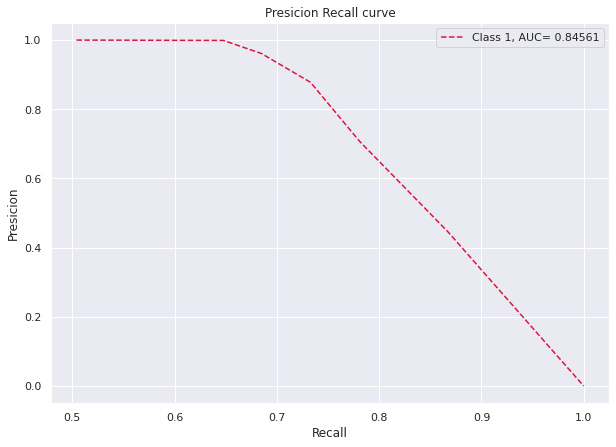

In [144]:
# Evaluation 
evaluation(y_train,y_train_proba_preds_knn_cv,y_test,y_test_proba_preds_knn_cv,y_train_predict_knn_cv,y_test_predict_knn_cv)

Train Confusion Matrix :
[[1442  479]
 [  78 1828]]
Test Confusion Matrix :
[[631 304]
 [116 834]]


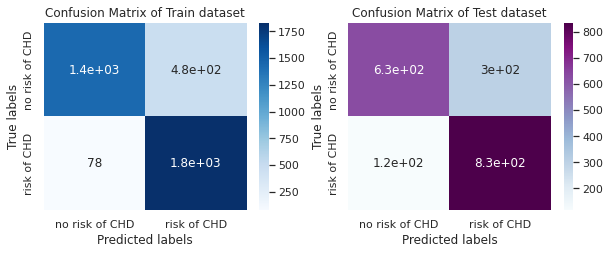

In [145]:
# Confusion Matrix
conf_mat(y_train,y_train_predict_knn_cv,y_test, y_test_predict_knn_cv)

In [146]:
# Gaussian Naive Bayes on Random Over Sampled data

In [147]:
# creating an instance of the model
gnb_cv = GaussianNB()

# Model Fit
gnb_cv.fit(X_train,y_train)

GaussianNB()

In [148]:
# Get predicted probability
y_train_proba_preds_gnb_cv = gnb_cv.predict_proba(X_train)[:,1]
y_test_proba_preds_gnb_cv = gnb_cv.predict_proba(X_test)[:,1]

In [149]:
# Get the predicted classes

y_train_predict_gnb_cv = gnb_cv.predict(X_train)
y_test_predict_gnb_cv = gnb_cv.predict(X_test)

In [150]:
# Get the accuracy scores
accuracy_scoress(y_train,y_train_predict_gnb_cv,y_test,y_test_predict_gnb_cv)

The accuracy on train data is : 58.4531
The accuracy on test data is  : 57.45358


The ROC AUC score on train data is          : 0.70977
The ROC AUC score on test data is           : 0.69653
The Precision Recall score on train data is : 0.68923
The Precision Recall score on test data is  : 0.6747
              precision    recall  f1-score   support

           0       0.54      0.90      0.68       935
           1       0.72      0.25      0.38       950

    accuracy                           0.57      1885
   macro avg       0.63      0.58      0.53      1885
weighted avg       0.63      0.57      0.53      1885



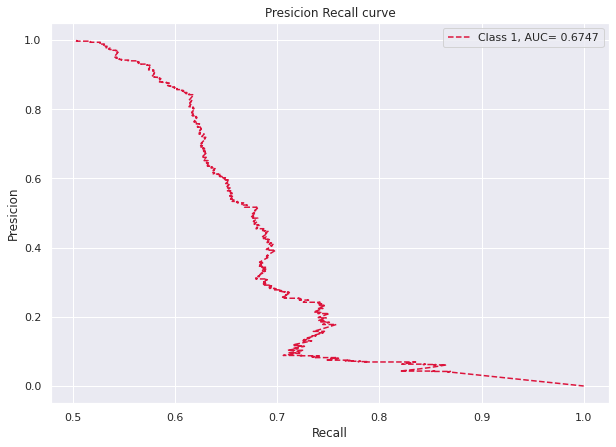

In [151]:
# Evaluation 
evaluation(y_train,y_train_proba_preds_gnb_cv,y_test,y_test_proba_preds_gnb_cv,y_train_predict_gnb_cv,y_test_predict_gnb_cv)

Train Confusion Matrix :
[[1733  188]
 [1402  504]]
Test Confusion Matrix :
[[842  93]
 [709 241]]


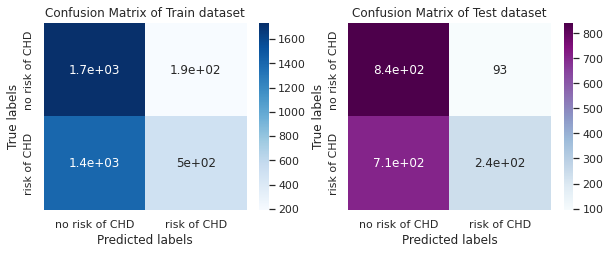

In [152]:
# Confusion Matrix
conf_mat(y_train,y_train_predict_gnb_cv,y_test, y_test_predict_gnb_cv)

In [153]:
# Model Performance

In [154]:
# Function for evaluation
model_pre_recall_train = []
model_pre_recall_test = []
def evaluation_model_perf(predicted_train_prob,predicted_test_prob):
  # Get the 'ROC AUC' and 'Precision Recall' scores

  # ROC AUC
  train_roc_auc_score = roc_auc_score(y_train,predicted_train_prob)
  test_roc_auc_score = roc_auc_score(y_test,predicted_test_prob)

  # print("The ROC AUC score on train data is          :", round(train_roc_auc_score,5))
  # print("The ROC AUC score on test data is           :", round(test_roc_auc_score,5))

  # Precision Recall curve

  precision_train, recall_train,_train = precision_recall_curve(y_train,predicted_train_prob)
  precision, recall,_ = precision_recall_curve(y_test,predicted_test_prob)
    
  # print(_)
  auc_score_train = auc(recall_train, precision_train)
  auc_score = auc(recall, precision)
  model_pre_recall_train.append(round(auc_score_train,5)*100)
  model_pre_recall_test.append(round(auc_score,5)*100)
  # print("The Precision Recall score on train data is :", round(auc_score_train,5))
  # print("The Precision Recall score on test data is  :", round(auc_score,5))


In [155]:
model = ['Logistic_Regressor','RandomForest_Classifier','GradientBoost_Classifier','XGB_Classifier','KNNeighbors_Classifier','GaussianNB']

# model_ROC_AUC_Score
roc_auc_train_lsts = [y_train_log_proba_preds,y_train_proba_preds_rfc_cv,y_train_proba_preds_gbc_cv,y_train_proba_preds_xgb_cv,y_train_proba_preds_knn_cv,y_train_proba_preds_gnb_cv]
model_roc_auc_train = []
for i in roc_auc_train_lsts:
  model_roc_auc_train.append(round((roc_auc_score(y_train,i)*100),4))

roc_auc_test_lsts = [y_test_log_proba_preds,y_test_proba_preds_rfc_cv,y_test_proba_preds_gbc_cv,y_test_proba_preds_xgb_cv,y_test_proba_preds_knn_cv,y_test_proba_preds_gnb_cv]
model_roc_auc_test = []
for i in roc_auc_test_lsts:
  model_roc_auc_test.append(round((roc_auc_score(y_test,i)*100),4))

# model precision and recall score
rec_train_lsts = [y_train_log_proba_preds,y_train_proba_preds_rfc_cv,y_train_proba_preds_gbc_cv,y_train_proba_preds_xgb_cv,y_train_proba_preds_knn_cv,y_train_proba_preds_gnb_cv]
pre_train_lsts = [y_test_log_proba_preds,y_test_proba_preds_rfc_cv,y_test_proba_preds_gbc_cv,y_test_proba_preds_xgb_cv,y_test_proba_preds_knn_cv,y_test_proba_preds_gnb_cv]
for i in enumerate(pre_train_lsts):
  evaluation_model_perf(rec_train_lsts[i[0]],pre_train_lsts[i[0]])
# print(model_pre_recall_train)
# print(model_pre_recall_test)

In [156]:
Model_perform = pd.DataFrame({'Models': model,'Train ROC AUC score':model_roc_auc_train,'Test ROC AUC score':model_roc_auc_test,'Train Precision recall score':model_pre_recall_train,'Test Precision recall score':model_pre_recall_test})
Model_perform.reset_index()

,index,Models,Train ROC AUC score,Test ROC AUC score,Train Precision recall score,Test Precision recall score
0,0,Logistic_Regressor,71.4341,69.9479,70.048,68.614
1,1,RandomForest_Classifier,99.9481,97.4129,99.952,97.841
2,2,GradientBoost_Classifier,99.9982,97.9320,99.998,97.744
3,3,XGB_Classifier,99.9950,97.2553,99.995,97.338
4,4,KNNeighbors_Classifier,95.4622,85.2187,95.932,84.561
5,5,GaussianNB,70.9767,69.6526,68.923,67.470


In [157]:
# Model Performance Function
def model_performance(bar1_lists,bar2_lists,model_lsts,bar1_color,bar2_color,bar1_label,bar2_label,xlabel,ylabel,title):
  bar1_list = bar1_lists
  bar2_list = bar2_lists

  width_of_RandA_rooms = 0.3
  bar1 = np.arange(len(model_lsts))
  bar2 = [i + width_of_RandA_rooms for i in bar1]

  plt.figure(figsize= (14,8))
  plt.bar(bar1,bar1_list,width_of_RandA_rooms,color = bar1_color, label = bar1_label)
  plt.bar(bar2,bar2_list,width_of_RandA_rooms,color = bar2_color, label = bar2_label)
  plt.xlabel(xlabel,fontsize = 15)
  plt.ylabel(ylabel,fontsize = 15)
  plt.title(title,fontsize = 15)
  plt.xticks(bar1+width_of_RandA_rooms/2,model_lsts,fontsize = 10)
  plt.legend()
  plt.show()
  

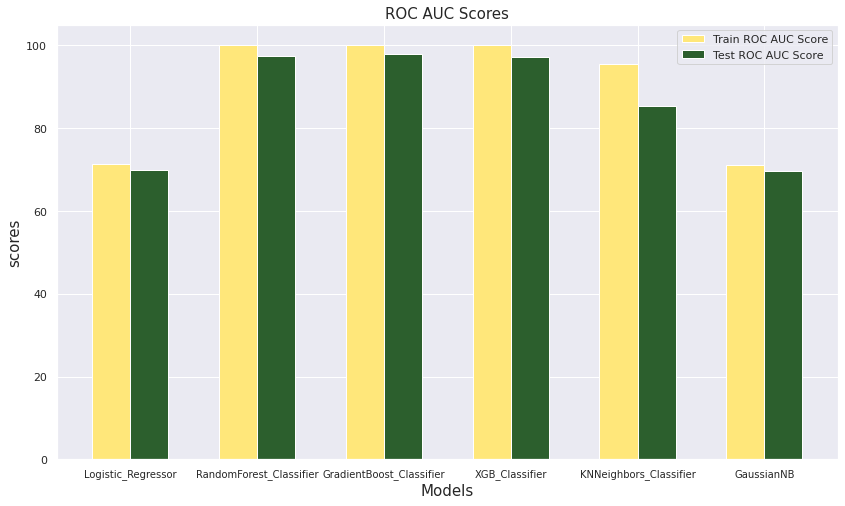

In [158]:
# ROC AUC Plot
model_performance(Model_perform['Train ROC AUC score'].to_list(),Model_perform['Test ROC AUC score'].to_list(),
                  model,'#FFE77AFF','#2C5F2DFF','Train ROC AUC Score','Test ROC AUC Score','Models',
                  'scores','ROC AUC Scores')

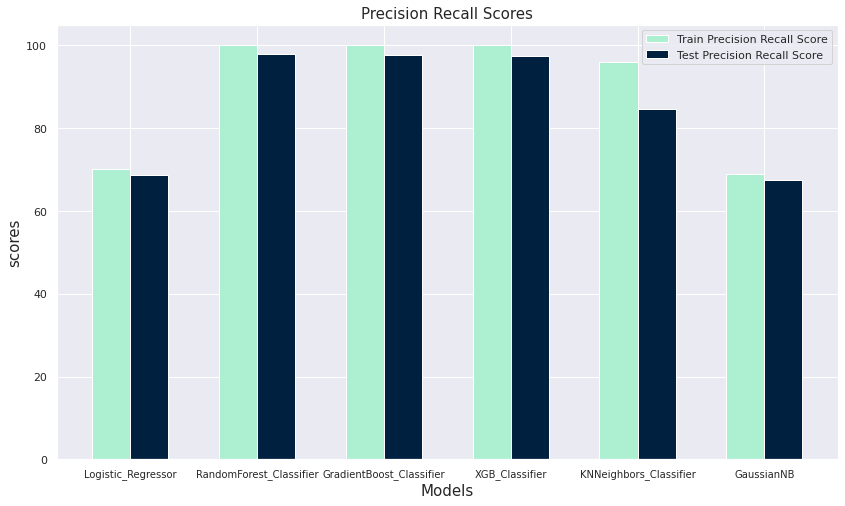

In [159]:
# Precision Recall
model_performance(Model_perform['Train Precision recall score'].to_list(),Model_perform['Test Precision recall score'].to_list(),
                  model,'#ADEFD1FF','#00203FFF','Train Precision Recall Score','Test Precision Recall Score','Models',
                  'scores','Precision Recall Scores')


In [160]:
# Feature Importance from Random Forest Regressor
imp_feat_values_rfr = RandomForestClassifier().fit(X_train,y_train).feature_importances_
# rfc_grid
# imp_feat_values_rfr = rfc_grid().fit(X_train,y_train).feature_importances_
columns_feat_imp = independent_variables

In [161]:
feat_impt = pd.DataFrame({'Columns' : columns_feat_imp,'Feature_importance_value' : imp_feat_values_rfr})
feat_impt.sort_values(by = 'Feature_importance_value',ascending  = False, inplace = True )

In [162]:
feat_impt.head()

,Columns,Feature_importance_value
0,age,0.154470
10,sysBP,0.136117
12,BMI,0.129214
9,totChol,0.124045
11,diaBP,0.111524


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 <a list of 15 Text major ticklabel objects>)

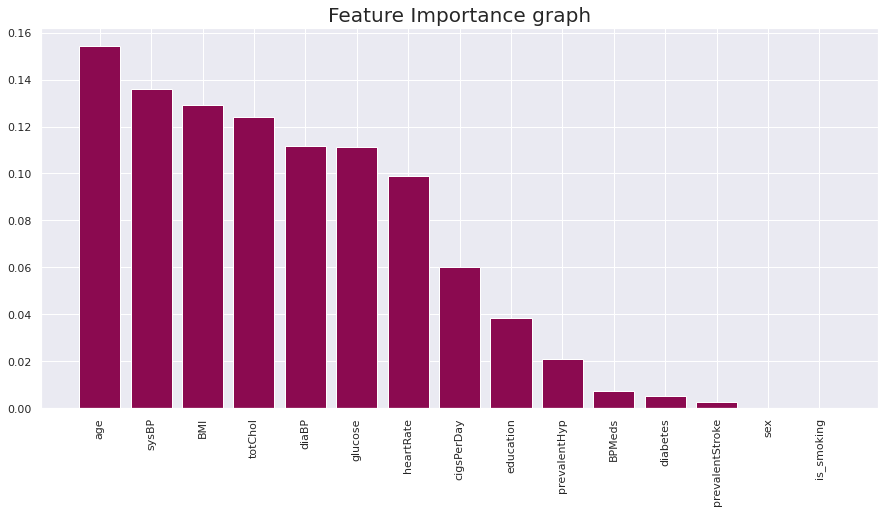

In [163]:
# Visualization of feature importance
plt.figure(figsize = (15,7))
sns.set(font_scale = 1)
plt.bar(feat_impt['Columns'],feat_impt['Feature_importance_value'],color ='#8B0A50')
plt.title('Feature Importance graph',fontsize = 20)
plt.xticks(rotation=90)